In [1]:
#*******************************************************************************************
 #
 #  File Name:  PyAviationAccidentsAnalysis.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, PyAviationAccidentsAnalysis, 
 #      conducts an analysis of the aviation accident data set.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  10/24/2023      Initial Development                     N. James George
 #
 #******************************************************************************************/

import PyFunctions as function
import PyLogFunctions as log_function
import PyLogSubRoutines as log_subroutine
import PySubRoutines as subroutine

import PyAviationAccidentsConstants as local_constant

import pandas as pd

In [2]:
CONSTANT_LOCAL_FILE_NAME \
    = 'PyAviationAccidentsAnalysis.ipynb'

In [3]:
log_subroutine \
    .SetLogMode \
        (False)

log_subroutine \
    .SetDebugMode \
        (False)

log_subroutine \
    .SetImageMode \
        (False)


log_subroutine \
    .BeginProgramExecution \
        ('PyAviationAccidentsAnalysis')

# <br> **Section 1: Data Retrievel**

## **1.1: Read CSV Files into DataFrames**

### **Aviation Accidents**

In [4]:
accidentsDataFrame \
    = function. \
        ReturnCSVFileAsDataFrame \
            (local_constant \
                 .AVIATION_ACCIDENTS_DATABASE_TABLE_CSV_FILE)

accidentsDataFrame \
    = accidentsDataFrame \
        .drop \
            (accidentsDataFrame.columns[0], 
             axis = 1)

accidentsDataFrame \
    ['country'] \
        .replace \
            ('United States of America', 
             'United States', 
             inplace = True)

accidentsDataFrame \
    = accidentsDataFrame \
        .fillna \
            ({'country_code': 
              'NA'})

accidentsDataFrame \
    = function \
        .ReturnDataFrameRowsWithoutValue \
            (accidentsDataFrame,
             'phase',
             ['Standing (STD)', 
              'Unknown (UNK)'])

accidentsDataFrame \
    = accidentsDataFrame \
        [accidentsDataFrame['occupants'] > 10]


log_function \
    .DebugReturnObjectWriteObject \
        (accidentsDataFrame)

### **Departure Airports**

In [5]:
departureDataFrame \
    = function. \
        ReturnCSVFileAsDataFrame \
            (local_constant \
                 .DEPARTURE_AIRPORTS_DATABASE_TABLE_CSV_FILE)

departureDataFrame \
    = departureDataFrame \
        .drop \
            (departureDataFrame.columns[0], 
             axis = 1)

departureDataFrame \
    ['country'] \
        .replace \
            ('United States of America', 
             'United States', 
             inplace = True)

departureDataFrame \
    = departureDataFrame \
        .fillna \
            ({'country_code': 
              'NA'})


log_function \
    .DebugReturnObjectWriteObject \
        (departureDataFrame)

### **Destination Airports**

In [6]:
destinationDataFrame \
    = function. \
        ReturnCSVFileAsDataFrame \
            (local_constant \
                 .DEPARTURE_AIRPORTS_DATABASE_TABLE_CSV_FILE)

destinationDataFrame \
    = destinationDataFrame \
        .drop \
            (destinationDataFrame.columns[0], 
             axis = 1)

destinationDataFrame \
    ['country'] \
        .replace \
            ('United States of America', 
             'United States', 
             inplace = True)

destinationDataFrame \
    = destinationDataFrame \
        .fillna \
            ({'country_code': 
              'NA'})


log_function \
    .DebugReturnObjectWriteObject \
        (destinationDataFrame)

## **Section 1.2: Display DataFrames**

### **Aviation Accidents**

In [7]:
captionString \
    = 'Table 1.2.1: Aviation Accidents (1970-2022)'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (accidentsDataFrame.head(12), 
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

accident_id,date,year,type,operator,fatalities,occupants,damage,phase,nature,departure,destination,location,place,state,country,country_code,lat,lon,narrative
ACC1003,1992-07-31,"1,992",Yakovlev YAK-42,China General Aviation Corp.,107,126,Destroyed,Takeoff (TOF),Domestic Scheduled Passenger,Nanjing Dajiaochang Airport,Xiamen Airport,Nanking Airport (NKG) (China),Nanking Airport,nan,China,CN,31.74,118.86,"China General Aviation Corp. flight 7552, a Yakovlev Yak-42D, was destroyed when it crashed during takeoff from Nanjing Dajiaochang Airport in China. Of the 126 persons on board the flight, 19 survived the accident.The aircraft operated on a scheduled passenger service to Xiamen Airport. During an attempted takeoff from runway 06, the flight failed to rotate, even as the speed increased past Vr speed.The flight crew then attempted to abort the takeoff, but the aircraft overran the runway at high speed. After 420 meters the aircraft crossed a 22 feet wide drainage ditch and impacted a 2 metre high embankment. The aircraft's ground speed at the time was 210 km/h (113 kts). It broke up and caught fire.It was established that the aircraft's horizontal stabiliser was trimmed in the landing configuration. This was not discovered because the crew probably did not perform the pre-flight checklist."
ACC1004,1992-08-27,"1,992",Tupolev TU-134,Aeroflot,84,84,Destroyed,Approach (APR),Domestic Scheduled Passenger,Donetsk Airport,Ivanovo Airport,3 km (1.9 mls) SE of Ivanovo Airport (IWA) (Russia),Ivanovo Airport,nan,Russia,RU,56.92,40.96,"The Tu-134 operated on a passenger flight from Donetsk to Ivanovo. Weather at the destination was poor with a visibility of 1200 m, haze, drizzle, and an overcast at 110 m.The aircraft deviated from the approach procedures and at a distance of 8600 m from the runway the aircraft was at 500 m (instead of 400 m as prescribed) with a lateral deviation of 1900 m to the right at a speed of 390 km/h with flaps and stabilizer not yet configured for final approach. None of the crew members reported the altitude and speed to the commander and the navigator had not given any information to allow the aircraft to align with the runway and glide path. The navigator then suggested the captain to select flaps to 20° and to make a turn to align with the runway. The captain ignored this and continued his approach with performing the necessary actions. While descending through a height of 350 m the GPWS sounded. The flight crew did not react to this warning.At a distance of 4500 m from the runway, the aircraft had a 200300 m lateral deviation from the approach path and had reached a height of 200 m. To reach the landing course, the commander began to turn to the right with a roll of up to 35°. The turn was performed uncoordinated, with the result that the vertical speed increased to 15-16 m/s. The approach continued to be unstabilized and at an altitude of about 80 m the navigator made a last attempt to convince the aircraft commander of the need for a go-around. Two seconds later the captain likely saw trees ahead and attempted a manouvre to avoid a collision.The aircraft struck trees 2962 m from the runway at a speed of 370 km/h and a rate of descent of 6 m/s. At that moment, the plane was 60 meters to the left of the extended runway centreline. The right wing broke up and the aircraft impacted the ground 512 m after the first point of impact.On the ground, a two storey residential house and several non-residential buildings were damaged."
ACC1006,1992-08-27,"1,992",de Havilland Canada DHC-6,Transportes Aéreos Nacionales de la Selva - TANS,8,21,Damaged beyond repair,En route (ENR),Domestic Non Scheduled Passenger,Iquitos Airport,El Estrecho Airport,near San Antonio del Estrecho (Peru),San Antonio del Estrecho,nan,Peru,PE,-12.64,-76.65,"The float-equipped Twin Otter crashed into the jungle 35 yards from the Algodon River when attempting an emergency landing after power loss of the engines. The aircraft had departed Iquitos

### **Departure Airports**

In [8]:
captionString \
    = 'Table 1.2.2: Departure Airports (1970-2022)'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (departureDataFrame.head(12), 
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

accident_id,date,year,icao,iata,name,state,country,country_code,lat,lon
ACC1003,1992-07-31,"1,992",ZSNJ,NKG,Nanjing Dajiaochang Airport,nan,China,CN,31.74,118.86
ACC1004,1992-08-27,"1,992",UKCC,DOK,Donetsk Airport,nan,Ukraine,UA,48.07,37.74
ACC1005,1992-08-27,"1,992",GYGM,YGM,Gimli Airport,MB,Canada,CA,50.63,-97.04
ACC1006,1992-08-27,"1,992",SPQT,IQT,Iquitos Airport,nan,Peru,PE,-3.78,-73.31
ACC1010,1992-09-10,"1,992",SPST,TPP,Tarapoto Airport,nan,Peru,PE,-6.51,-76.37
ACC1013,1992-10-01,"1,992",KSCK,SCK,Stockton Airport,CA,United States,US,37.89,-121.24
ACC1015,1992-12-09,"1,992",MMPN,UPN,Uruapan Airport,nan,Mexico,MX,19.40,-102.04
ACC1016,1992-12-10,"1,992",KDAY,DAY,Dayton Airport,OH,United States,US,39.90,-84.22
ACC1017,1992-12-13,"1,992",FZOA,KND,Kindu Airport,nan,Democratic Republic of the Congo,CD,-2.92,25.92
ACC1019,1993-01-13,"1,993",EGMC,SEN,Southend Municipal Airport,nan,United Kingdom,GB,51.57,0.70


### **Destination Airports**

In [9]:
captionString \
    = 'Table 1.2.3: Destination Airports (1970-2022)'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (destinationDataFrame.head(12), 
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

accident_id,date,year,icao,iata,name,state,country,country_code,lat,lon
ACC1003,1992-07-31,"1,992",ZSNJ,NKG,Nanjing Dajiaochang Airport,nan,China,CN,31.74,118.86
ACC1004,1992-08-27,"1,992",UKCC,DOK,Donetsk Airport,nan,Ukraine,UA,48.07,37.74
ACC1005,1992-08-27,"1,992",GYGM,YGM,Gimli Airport,MB,Canada,CA,50.63,-97.04
ACC1006,1992-08-27,"1,992",SPQT,IQT,Iquitos Airport,nan,Peru,PE,-3.78,-73.31
ACC1010,1992-09-10,"1,992",SPST,TPP,Tarapoto Airport,nan,Peru,PE,-6.51,-76.37
ACC1013,1992-10-01,"1,992",KSCK,SCK,Stockton Airport,CA,United States,US,37.89,-121.24
ACC1015,1992-12-09,"1,992",MMPN,UPN,Uruapan Airport,nan,Mexico,MX,19.40,-102.04
ACC1016,1992-12-10,"1,992",KDAY,DAY,Dayton Airport,OH,United States,US,39.90,-84.22
ACC1017,1992-12-13,"1,992",FZOA,KND,Kindu Airport,nan,Democratic Republic of the Congo,CD,-2.92,25.92
ACC1019,1993-01-13,"1,993",EGMC,SEN,Southend Municipal Airport,nan,United Kingdom,GB,51.57,0.70


# <br> **Section 2: Aviation Fatalities per Year**

## **2.1: Calculations**

In [10]:
yearByFatalitiesSeries \
    = accidentsDataFrame \
        .groupby \
            ('year') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (yearByFatalitiesSeries)

## **2.2: Display Information**

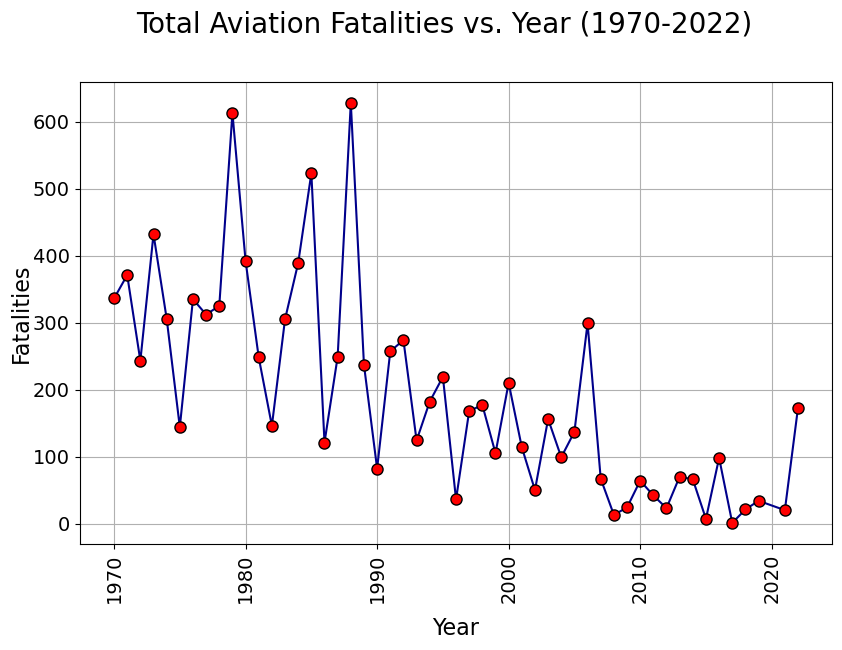

In [11]:
subroutine \
    .DisplayMultiLineGraphFromDataFrame \
        (yearByFatalitiesSeries.squeeze(),
         ['darkblue'],
         'Total Aviation Fatalities vs. Year (1970-2022)',
         'Year',
         'Fatalities',
         legendFlagBoolean = False,
         markerSizeInteger = 8)

# <br> **Section 3: Flight Casualty Rate per Year**

## **3.1: Calculations**

In [12]:
yearByOccupantsSeries \
    = accidentsDataFrame \
        .groupby \
            ('year') \
                ['occupants'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (yearByOccupantsSeries)

In [13]:
yearByCasualtyRateSeries \
    = round((yearByFatalitiesSeries \
       / yearByOccupantsSeries) \
      * 100, 1)


log_function \
    .DebugReturnObjectWriteObject \
        (yearByCasualtyRateSeries)

## **3.2: Display Information**

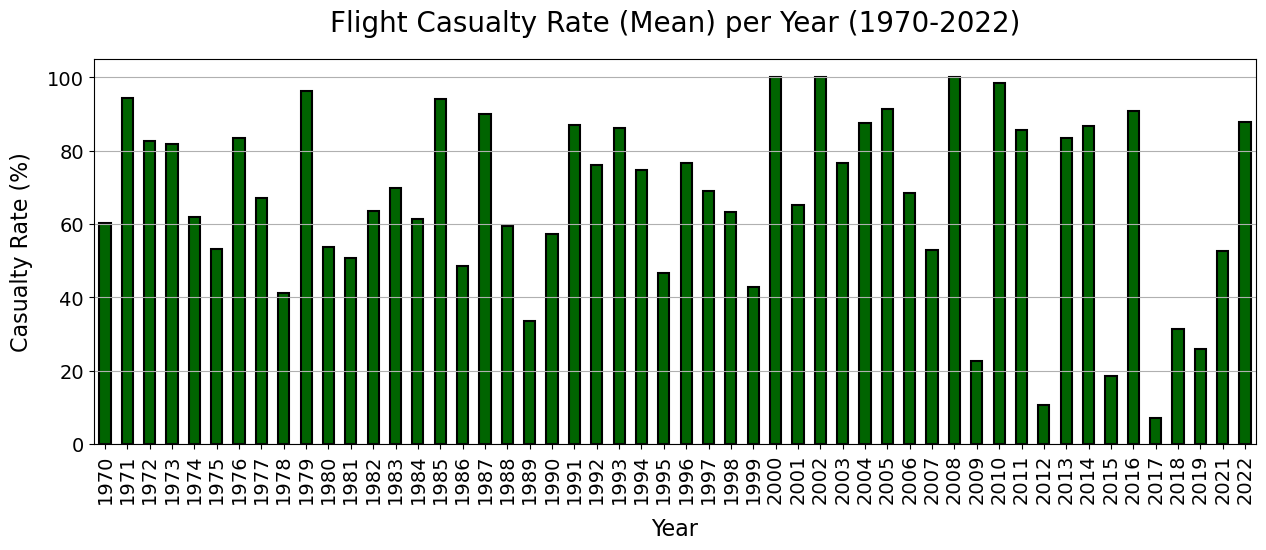

In [14]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (yearByCasualtyRateSeries.squeeze(),
         ['darkgreen'],
         'Flight Casualty Rate (Mean) per Year (1970-2022)',
         'Casualty Rate (%)',
         xLabelStringParameter \
            = 'Year',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0,
         figureSizeFloatList \
            = [15.0, 5.0])

# <br> **Section 4: Flight Casualty Rate Distribution per Year**

## **4.1: Calculations**

In [15]:
casualtyRateDataFrame \
    = accidentsDataFrame \
        .copy()

casualtyRateDataFrame \
    ['casualty_rate'] \
        = (casualtyRateDataFrame['fatalities'] \
           / casualtyRateDataFrame['occupants']) \
          * 100

casualtyRateDataFrame \
    .drop \
        (columns \
             = ['accident_id', 
                'date', 
                'type', 
                'operator',
                'damage', 
                'phase', 
                'nature',
                'departure', 
                'destination', 
                'location', 
                'place', 
                'state', 
                'country', 
                'country_code', 
                'lat',
                'lon',
                'narrative'],
         axis = 1,
         inplace = True)

log_function \
    .DebugReturnObjectWriteObject \
        (casualtyRateDataFrame)

In [16]:
yearIntegerList \
    = sorted \
        (casualtyRateDataFrame \
             ['year'] \
                 .unique()
                 .tolist())

casualtyRateSeriesList \
    = []

for year in yearIntegerList:
 
    tempDataFrame \
        = function \
            .ReturnDataFrameRowsWithValue \
                (casualtyRateDataFrame,
                 'year',
                 [year])
    
    casualtyRateSeriesList \
        .append \
            (tempDataFrame['casualty_rate'].copy())
    

log_function \
    .DebugReturnObjectWriteObject \
        (casualtyRateSeriesList)

## **4.2: Display Information**

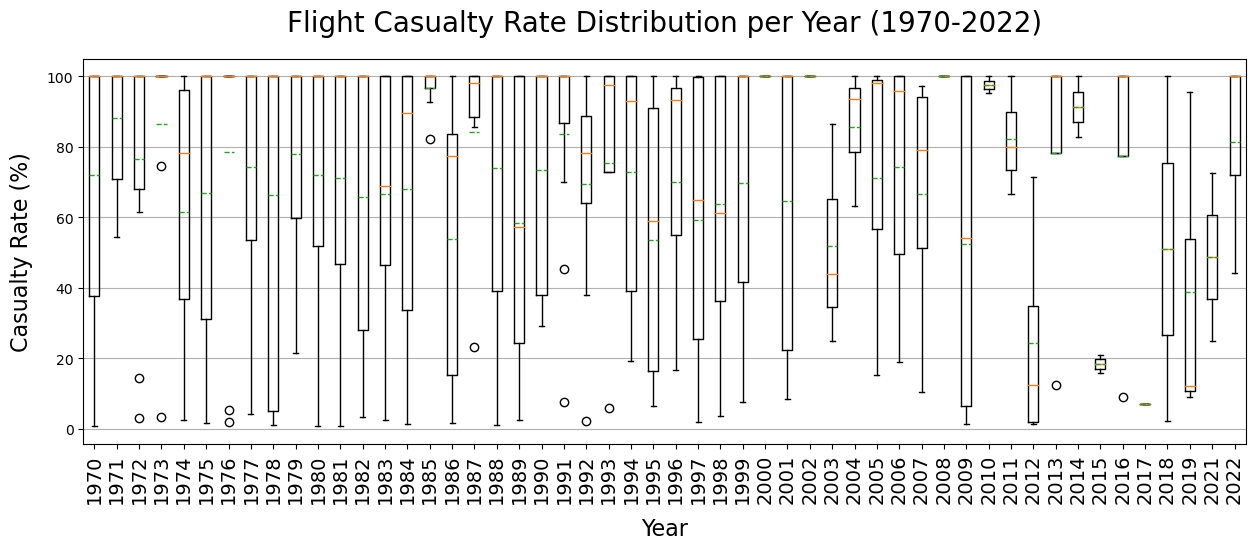

In [17]:
subroutine \
    .DisplayMatplotlibBoxPlotFromSeriesList \
        (casualtyRateSeriesList,
         yearIntegerList,
         'Year',
         'Casualty Rate (%)',
         'Flight Casualty Rate Distribution per Year (1970-2022)',
         xTicksRotationFloat = 90.0,
         figureSizeFloatList \
            = [15.0, 5.0])

# <br> **Section 5:  Fatalities per Flight Phase**

## **5.1: Calculations**

In [18]:
flightPhaseByFatalitiesSeries \
    = accidentsDataFrame \
        .groupby \
            ('phase') \
                ['fatalities'] \
        .sum()

log_function \
    .DebugReturnObjectWriteObject \
        (flightPhaseByFatalitiesSeries)

## **5.2: Display Information**

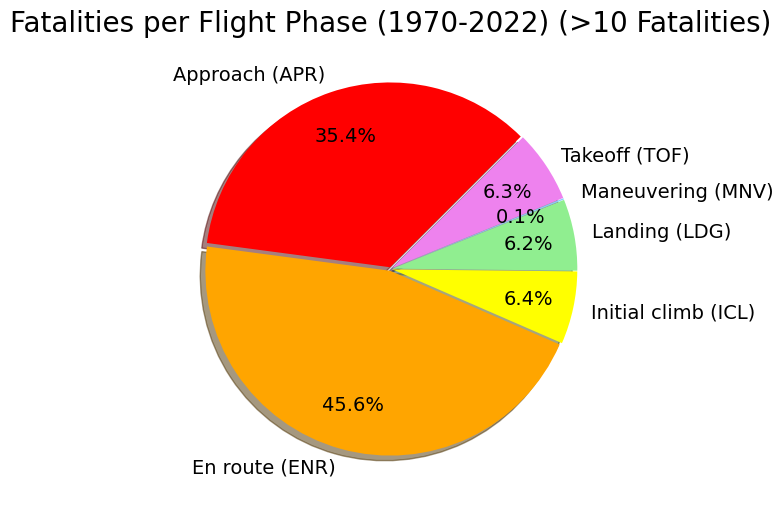

In [19]:
colorsPieList \
    = ['red',
       'orange',
       'yellow',
       'lightgreen',
       'lightskyblue',
       'violet']

explodeTuple \
    = (0.01, 
       0.01, 
       0.01, 
       0.01, 
       0.01,
       0.01)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (flightPhaseByFatalitiesSeries.squeeze(), 
         colorsPieList,
         explodeTuple,
         'Fatalities per Flight Phase (1970-2022) (>10 Fatalities)',
         startAngleFloatParameter \
            = 45.0,
         autoPercentStringParameter \
            = '%1.1f%%')

# <br> **Section 6:  Fatalities per Aircraft Operator**

## **6.1: Calculations**

### **1970s**

In [20]:
accidents1970sDataFrame \
    = accidentsDataFrame \
        .loc \
            [(accidentsDataFrame['year'] >= 1970) \
              & (accidentsDataFrame['year'] <= 1979)]

operator1970sDataFrame \
    = accidents1970sDataFrame \
        [(accidents1970sDataFrame['fatalities'] > 30)]

operatorByFatalities1970sSeries \
    = operator1970sDataFrame \
        .groupby \
            ('operator') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (operatorByFatalities1970sSeries)

### **1980s**

In [21]:
accidents1980sDataFrame \
    = accidentsDataFrame \
        .loc \
            [(accidentsDataFrame['year'] >= 1980) \
              & (accidentsDataFrame['year'] <= 1989)]

operator1980sDataFrame \
    = accidents1980sDataFrame \
        [(accidents1980sDataFrame['fatalities'] > 30)]

operatorByFatalities1980sSeries \
    = operator1980sDataFrame \
        .groupby \
            ('operator') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (operatorByFatalities1980sSeries)

### **1990s**

In [22]:
accidents1990sDataFrame \
    = accidentsDataFrame \
        .loc \
            [(accidentsDataFrame['year'] >= 1990) \
              & (accidentsDataFrame['year'] <= 1999)]

operator1990sDataFrame \
    = accidents1990sDataFrame \
        [(accidents1990sDataFrame['fatalities'] > 30)]

operatorByFatalities1990sSeries \
    = operator1990sDataFrame \
        .groupby \
            ('operator') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (operatorByFatalities1990sSeries)

### **2000s**

In [23]:
accidents2000sDataFrame \
    = accidentsDataFrame \
        .loc \
            [(accidentsDataFrame['year'] >= 2000) \
              & (accidentsDataFrame['year'] <= 2009)]

operator2000sDataFrame \
    = accidents2000sDataFrame \
        [(accidents2000sDataFrame['fatalities'] > 30)]

operatorByFatalities2000sSeries \
    = operator2000sDataFrame \
        .groupby \
            ('operator') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (operatorByFatalities2000sSeries)

### **2010s**

In [24]:
accidents2010sDataFrame \
    = accidentsDataFrame \
        .loc \
            [(accidentsDataFrame['year'] >= 2010) \
              & (accidentsDataFrame['year'] <= 2019)]

operator2010sDataFrame \
    = accidents2010sDataFrame \
        [(accidents2010sDataFrame['fatalities'] > 30)]

operatorByFatalities2010sSeries \
    = operator2010sDataFrame \
        .groupby \
            ('operator') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (operatorByFatalities2010sSeries)

### **2020s**

In [25]:
accidents2020sDataFrame \
    = accidentsDataFrame \
        .loc \
            [(accidentsDataFrame['year'] >= 2020) \
              & (accidentsDataFrame['year'] <= 2022)]

operator2020sDataFrame \
    = accidents2020sDataFrame \
        [(accidents2020sDataFrame['fatalities'] > 0)]

operatorByFatalities2020sSeries \
    = operator2020sDataFrame \
        .groupby \
            ('operator') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (operatorByFatalities2020sSeries)

### **1970-2022**

In [26]:
operatorDataFrame \
    = accidentsDataFrame \
        [(accidentsDataFrame['fatalities'] > 100)]

operatorByFatalitiesSeries \
    = operatorDataFrame \
        .groupby \
            ('operator') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (operatorByFatalitiesSeries)

## **6.2: Display Information**

### **1970s**

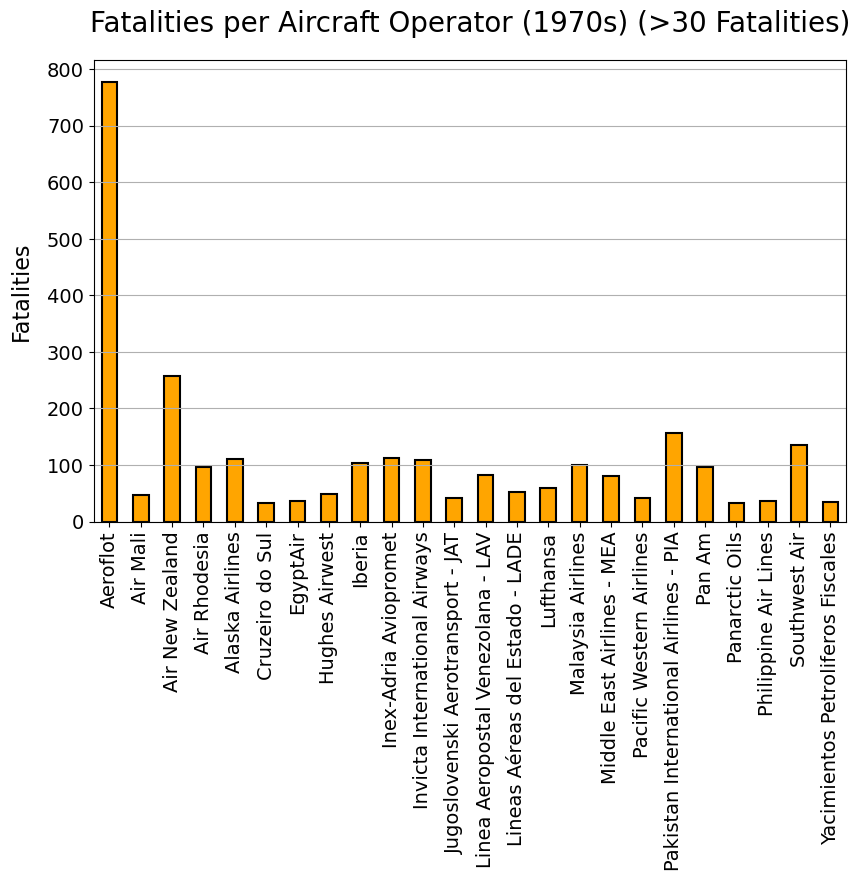

In [27]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (operatorByFatalities1970sSeries.squeeze(),
         ['orange'],
         'Fatalities per Aircraft Operator (1970s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1980s**

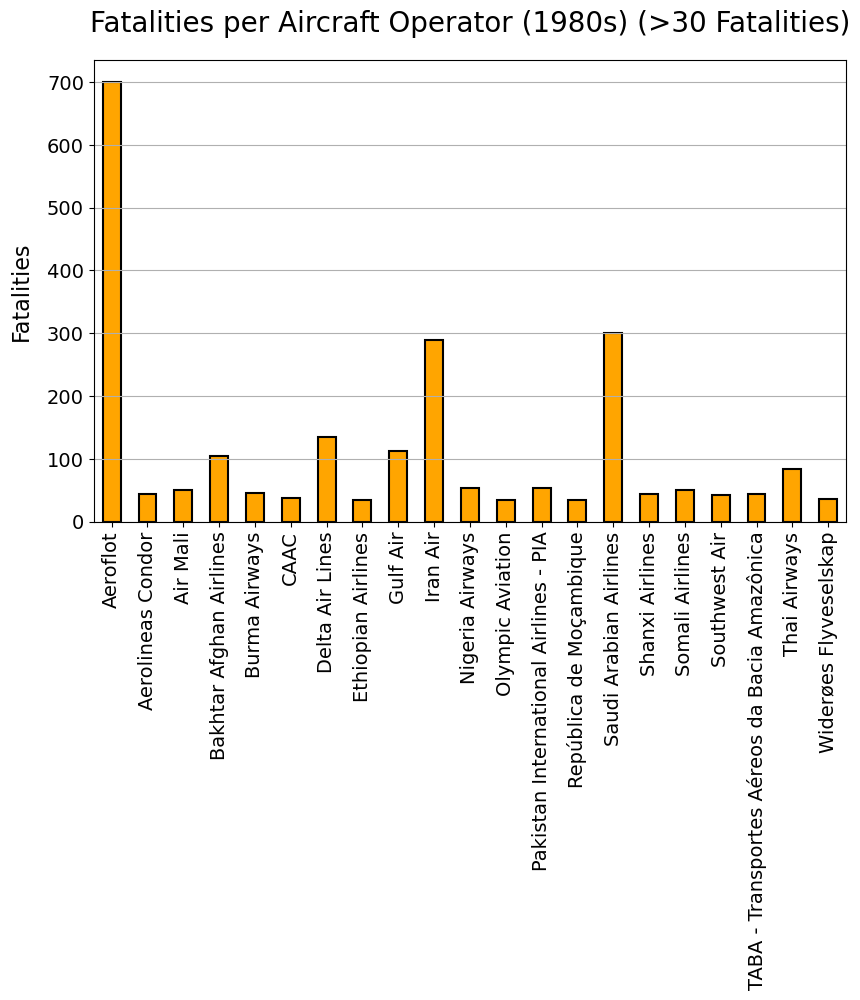

In [28]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (operatorByFatalities1980sSeries.squeeze(),
         ['orange'],
         'Fatalities per Aircraft Operator (1980s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1990s**

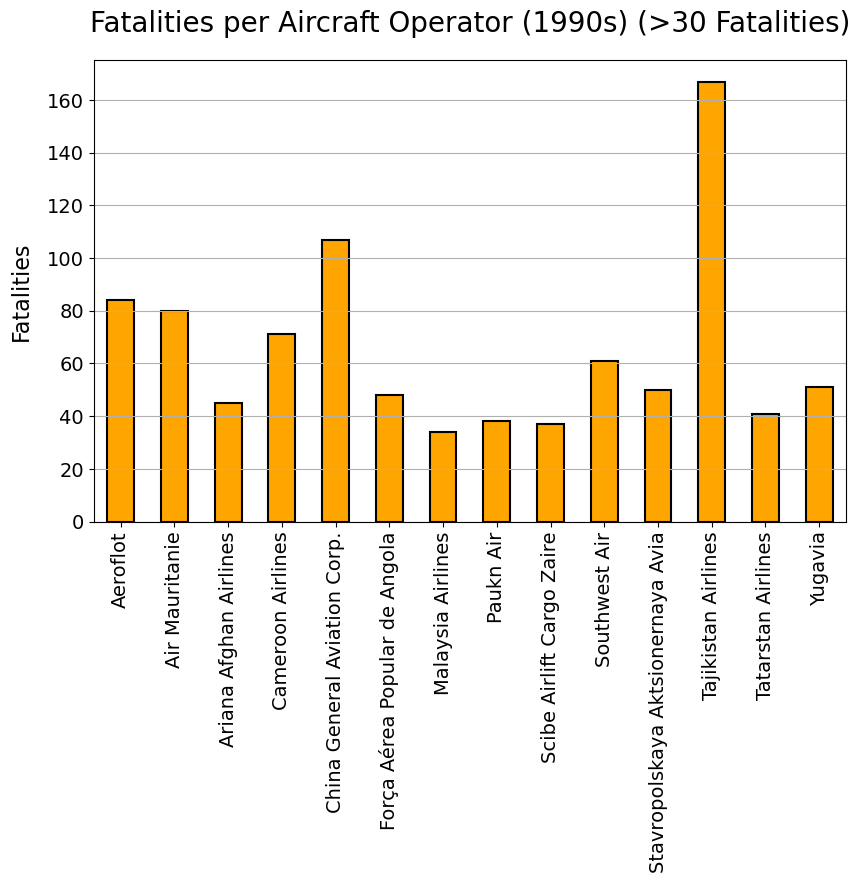

In [29]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (operatorByFatalities1990sSeries.squeeze(),
         ['orange'],
         'Fatalities per Aircraft Operator (1990s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2000s**

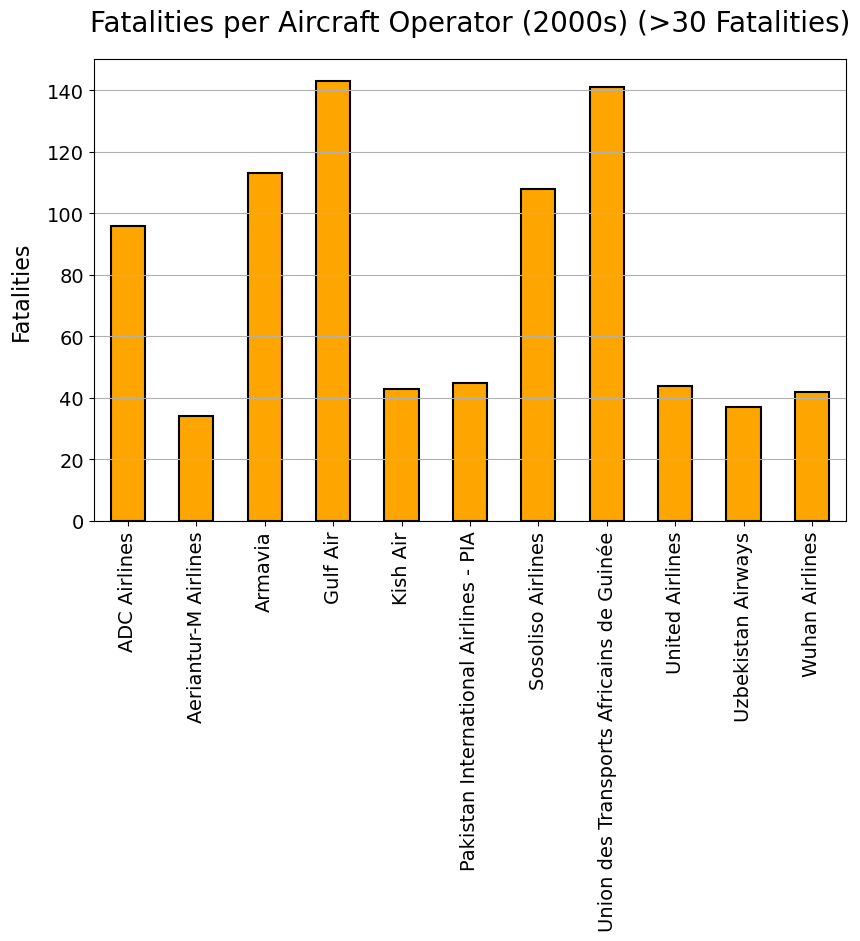

In [30]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (operatorByFatalities2000sSeries.squeeze(),
         ['orange'],
         'Fatalities per Aircraft Operator (2000s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2010s**

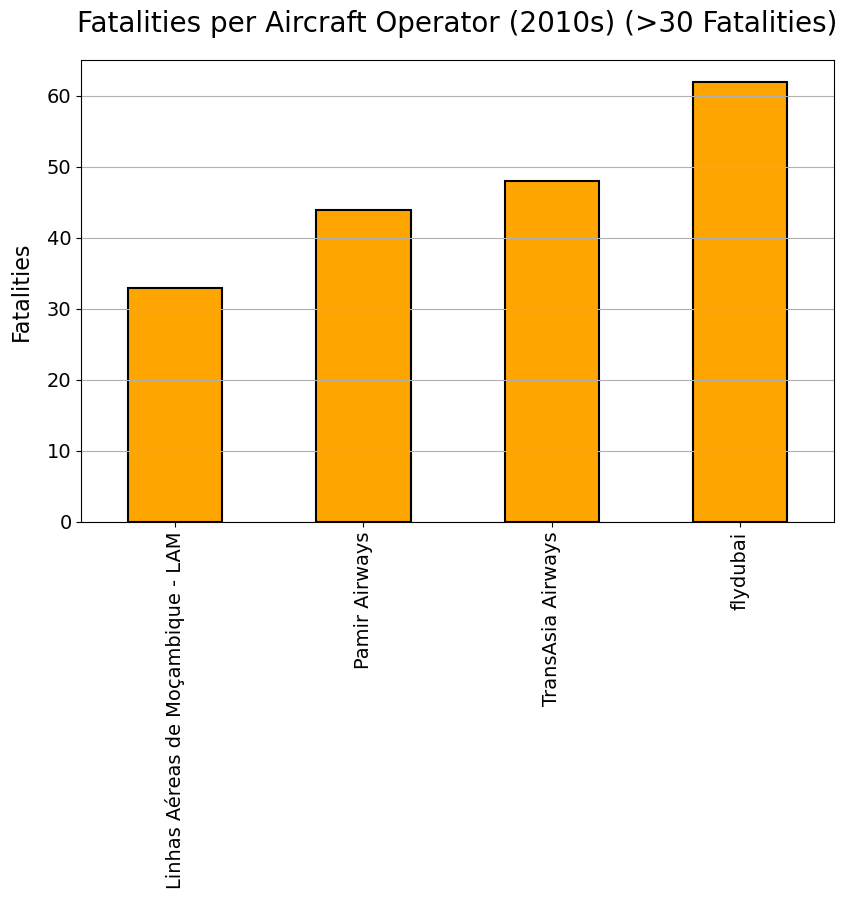

In [31]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (operatorByFatalities2010sSeries.squeeze(),
         ['orange'],
         'Fatalities per Aircraft Operator (2010s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2020s**

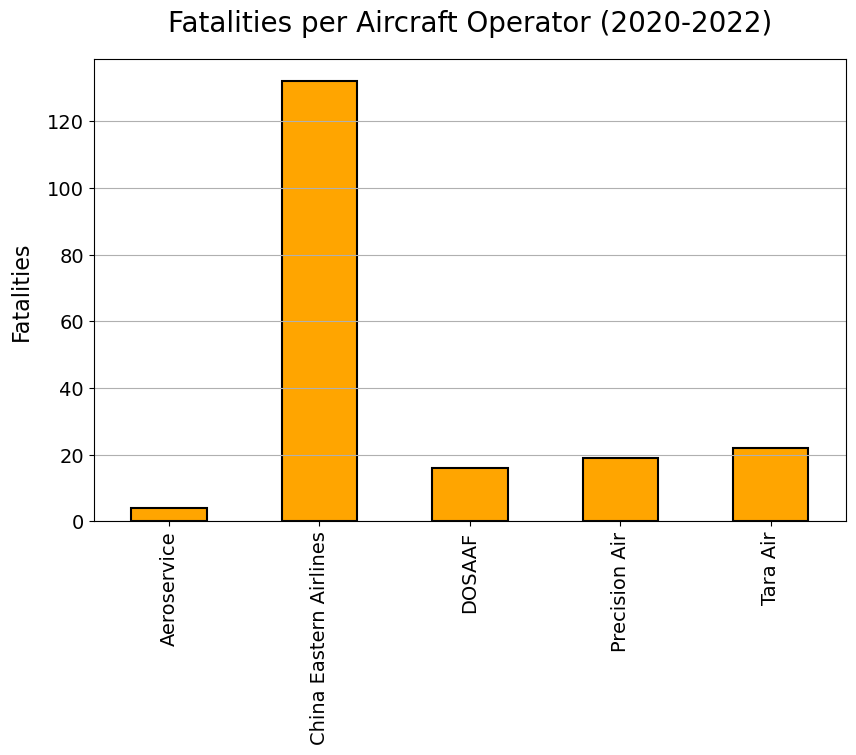

In [32]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (operatorByFatalities2020sSeries.squeeze(),
         ['orange'],
         'Fatalities per Aircraft Operator (2020-2022)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1970-2022**

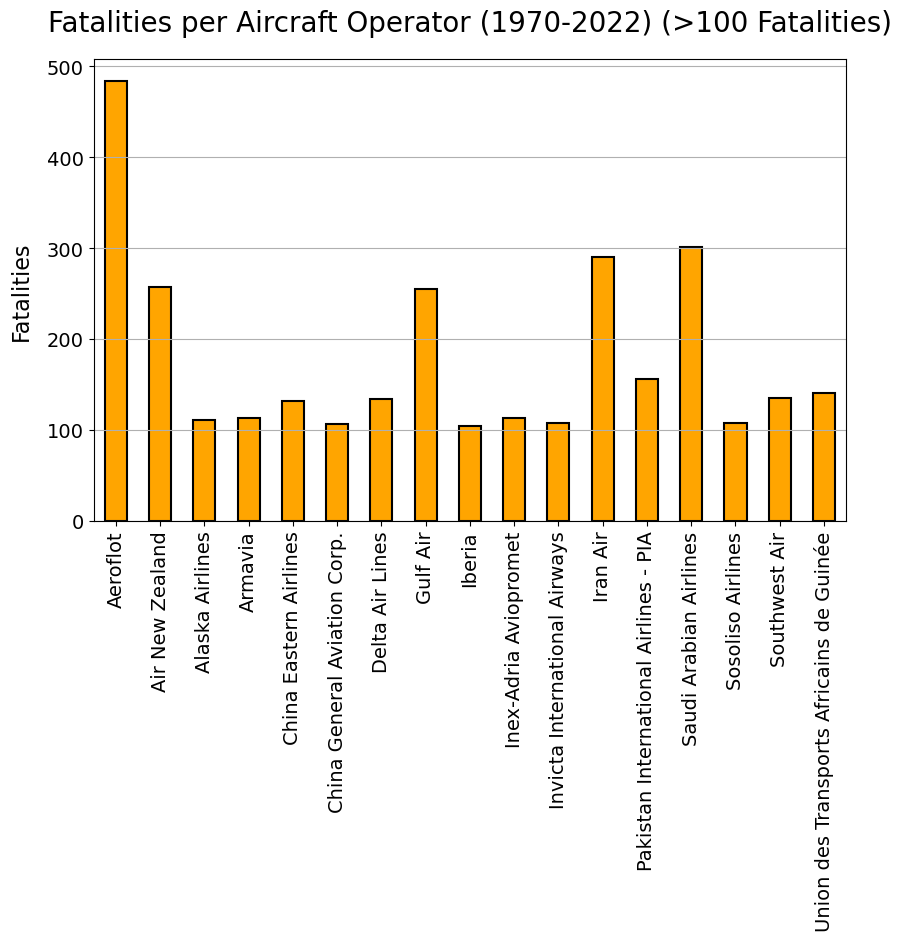

In [33]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (operatorByFatalitiesSeries.squeeze(),
         ['orange'],
         'Fatalities per Aircraft Operator (1970-2022) (>100 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

# <br> **Section 7:  Fatalities per Aircraft Type**

## **7.1: Calculations**

### **1970s**

In [34]:
type1970sDataFrame \
    = accidents1970sDataFrame \
        [(accidents1970sDataFrame['fatalities'] > 30)]

typeByFatalities1970sSeries \
    = type1970sDataFrame \
        .groupby \
            ('type') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (typeByFatalities1970sSeries)

### **1980s**

In [35]:
type1980sDataFrame \
    = accidents1980sDataFrame \
        [(accidents1980sDataFrame['fatalities'] > 30)]

typeByFatalities1980sSeries \
    = type1980sDataFrame \
        .groupby \
            ('type') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (typeByFatalities1980sSeries)

### **1990s**

In [36]:
type1990sDataFrame \
    = accidents1990sDataFrame \
        [(accidents1990sDataFrame['fatalities'] > 30)]

typeByFatalities1990sSeries \
    = type1990sDataFrame \
        .groupby \
            ('type') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (typeByFatalities1990sSeries)

### **2000s**

In [37]:
type2000sDataFrame \
    = accidents2000sDataFrame \
        [(accidents2000sDataFrame['fatalities'] > 30)]

typeByFatalities2000sSeries \
    = type2000sDataFrame \
        .groupby \
            ('type') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (operatorByFatalities2000sSeries)

### **2010s**

In [38]:
type2010sDataFrame \
    = accidents2010sDataFrame \
        [(accidents2010sDataFrame['fatalities'] > 30)]

typeByFatalities2010sSeries \
    = type2010sDataFrame \
        .groupby \
            ('type') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (typeByFatalities2010sSeries)

### **2020s**

In [39]:
type2020sDataFrame \
    = accidents2020sDataFrame \
        [(accidents2020sDataFrame['fatalities'] > 0)]

typeByFatalities2020sSeries \
    = type2020sDataFrame \
        .groupby \
            ('type') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (typeByFatalities2020sSeries)

### **1970-2022**

In [40]:
typeDataFrame \
    = accidentsDataFrame \
        [(accidentsDataFrame['fatalities'] > 100)]

typeByFatalitiesSeries \
    = typeDataFrame \
        .groupby \
            ('type') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (typeByFatalitiesSeries)

## **7.2: Display Information**

### **1970s**

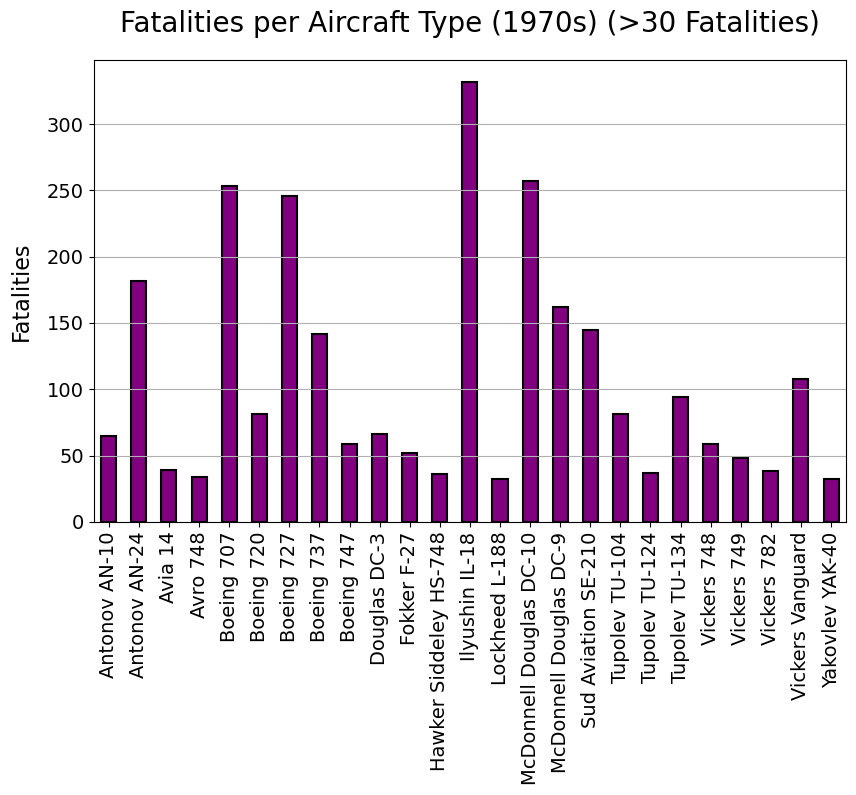

In [41]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (typeByFatalities1970sSeries.squeeze(),
         ['purple'],
         'Fatalities per Aircraft Type (1970s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1980s**

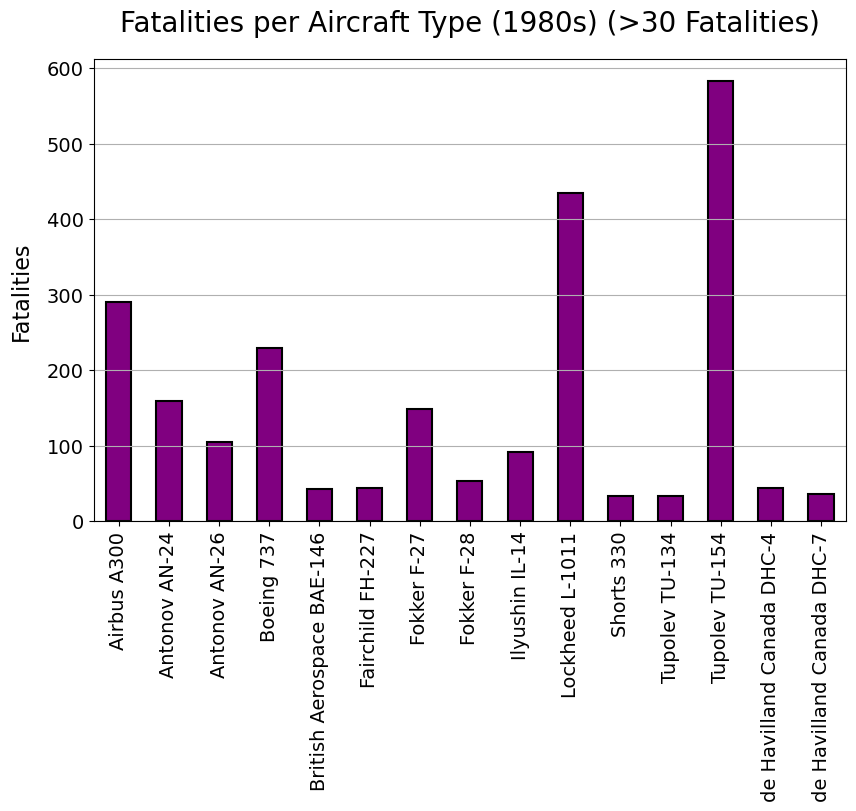

In [42]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (typeByFatalities1980sSeries.squeeze(),
         ['purple'],
         'Fatalities per Aircraft Type (1980s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1990s**

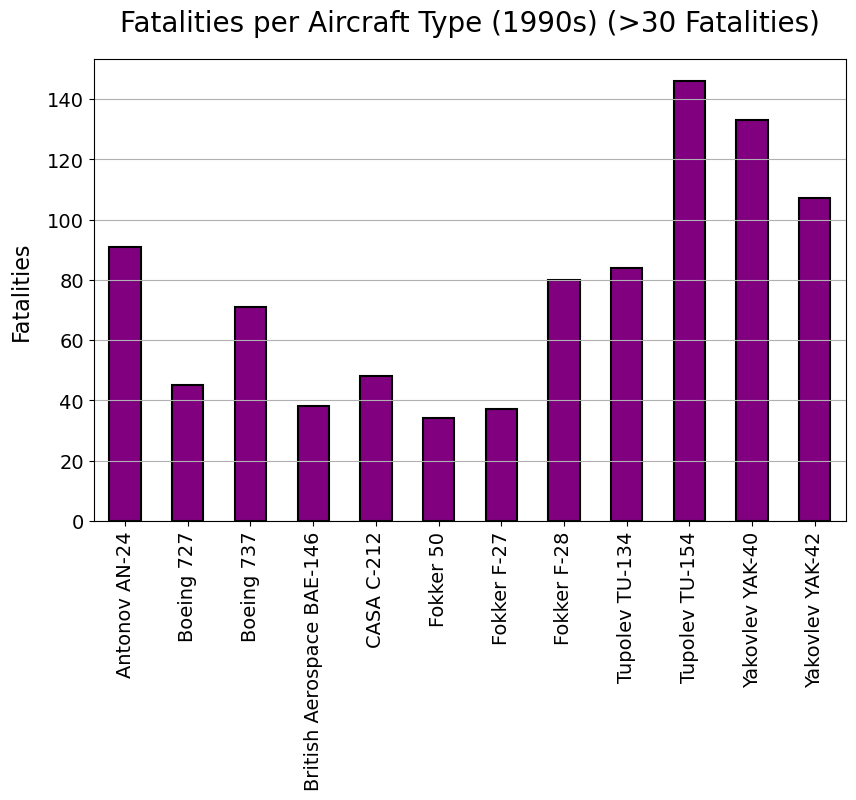

In [43]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (typeByFatalities1990sSeries.squeeze(),
         ['purple'],
         'Fatalities per Aircraft Type (1990s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2000s**

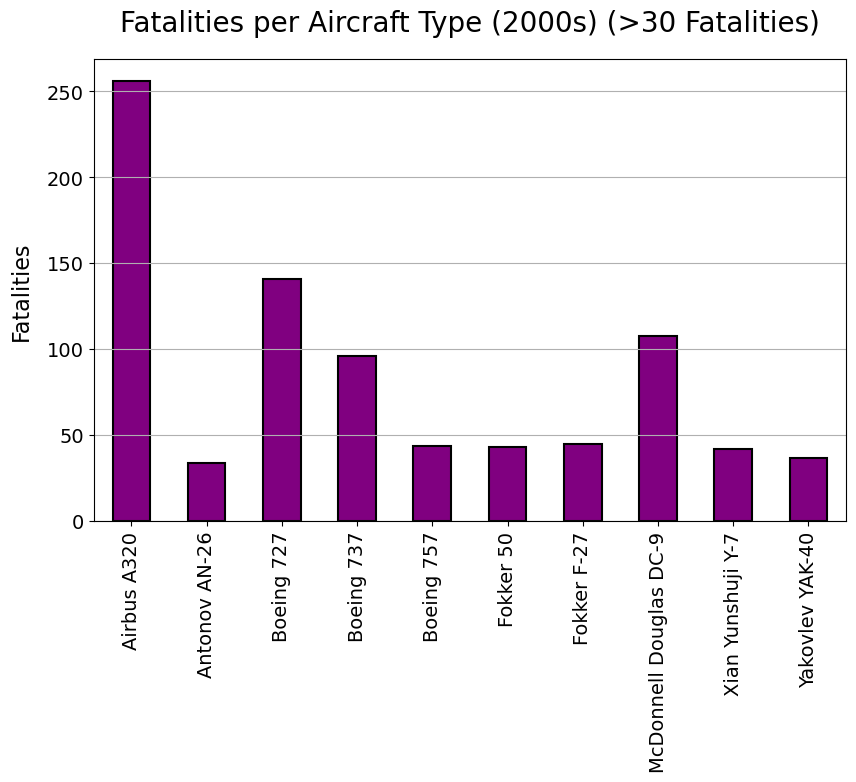

In [44]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (typeByFatalities2000sSeries.squeeze(),
         ['purple'],
         'Fatalities per Aircraft Type (2000s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2010s**

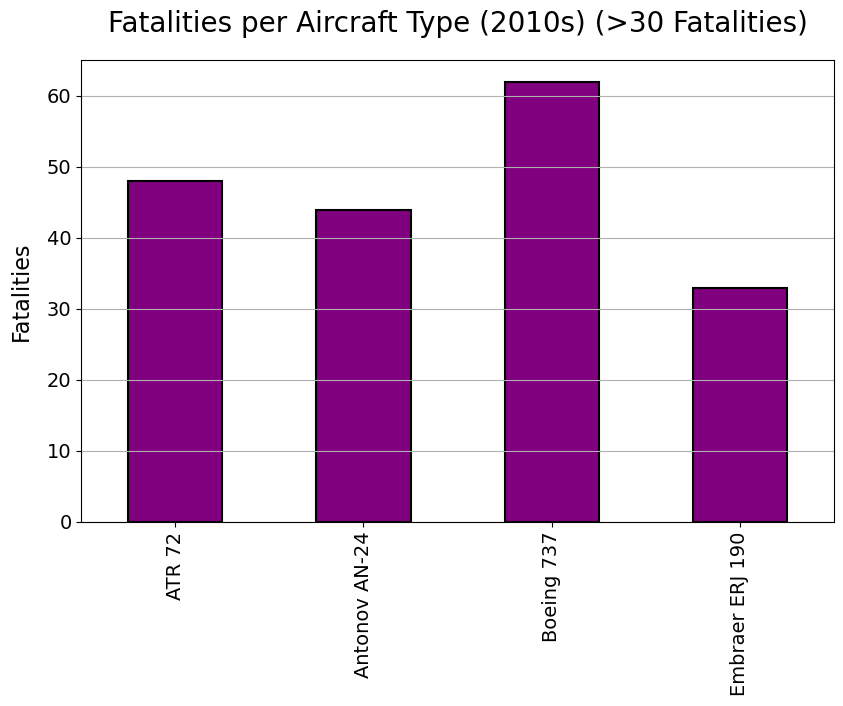

In [45]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (typeByFatalities2010sSeries.squeeze(),
         ['purple'],
         'Fatalities per Aircraft Type (2010s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2020s**

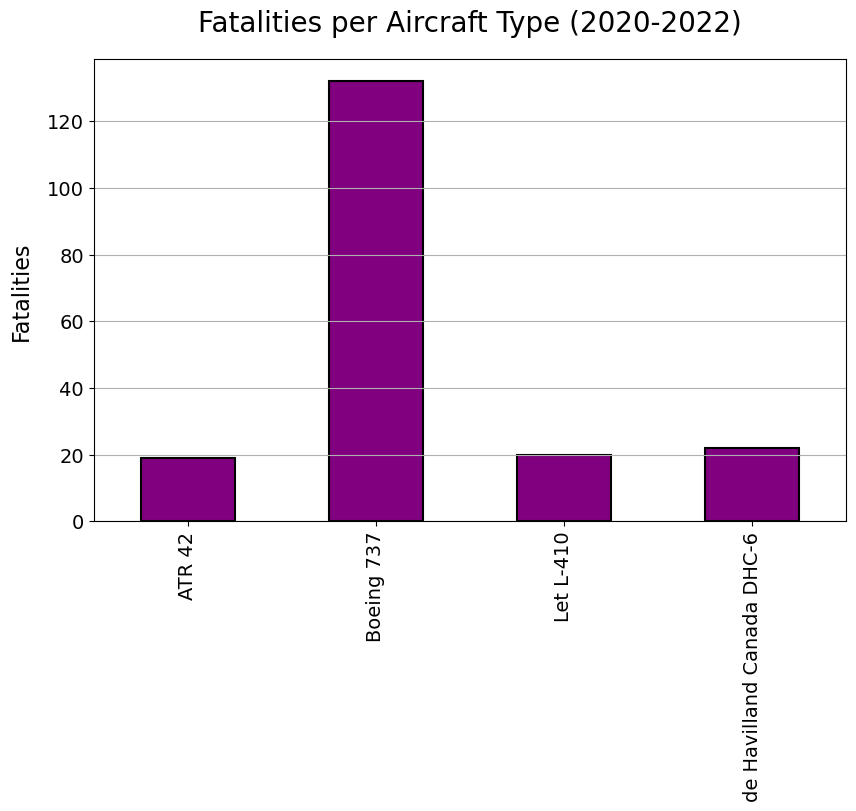

In [46]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (typeByFatalities2020sSeries.squeeze(),
         ['purple'],
         'Fatalities per Aircraft Type (2020-2022)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1970-2022**

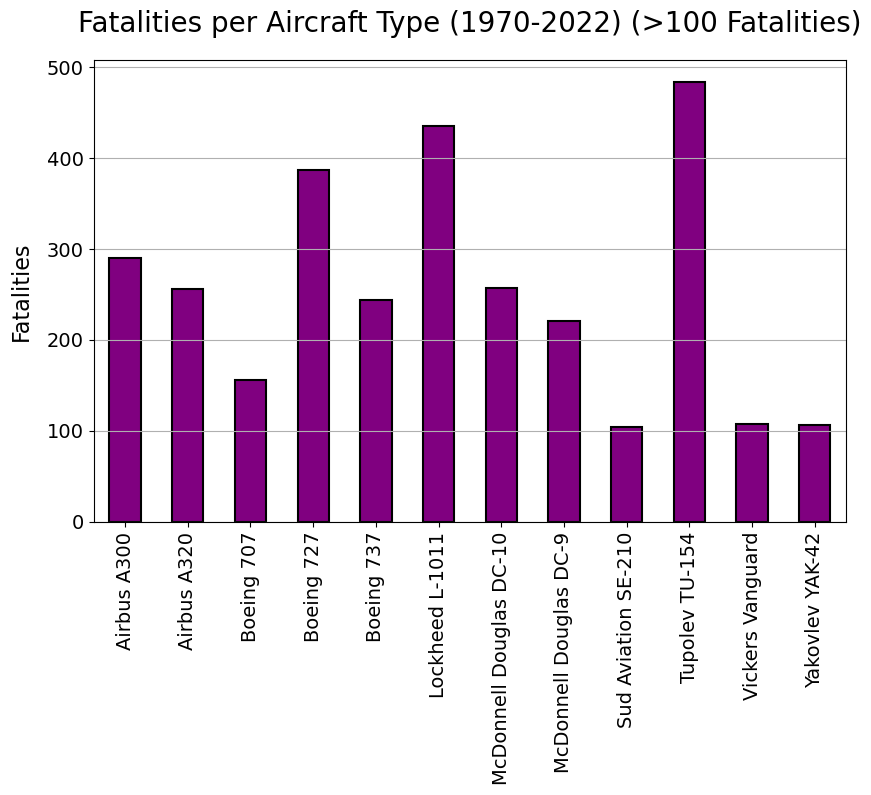

In [47]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (typeByFatalitiesSeries.squeeze(),
         ['purple'],
         'Fatalities per Aircraft Type (1970-2022) (>100 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

# <br> **Section 8:  Fatalities per Nature of Flight**

## **8.1: Calculations**

### **1970s**

In [48]:
nature1970sDataFrame \
    = accidents1970sDataFrame \
        [(accidents1970sDataFrame['fatalities'] > 30)]

natureByFatalities1970sSeries \
    = nature1970sDataFrame \
        .groupby \
            ('nature') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (natureByFatalities1970sSeries)

### **1980s**

In [49]:
nature1980sDataFrame \
    = accidents1980sDataFrame \
        [(accidents1980sDataFrame['fatalities'] > 30)]

natureByFatalities1980sSeries \
    = nature1980sDataFrame \
        .groupby \
            ('nature') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (natureByFatalities1980sSeries)

### **1990s**

In [50]:
nature1990sDataFrame \
    = accidents1990sDataFrame \
        [(accidents1990sDataFrame['fatalities'] > 30)]

natureByFatalities1990sSeries \
    = nature1990sDataFrame \
        .groupby \
            ('nature') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (natureByFatalities1990sSeries)

### **2000s**

In [51]:
nature2000sDataFrame \
    = accidents2000sDataFrame \
        [(accidents2000sDataFrame['fatalities'] > 30)]

natureByFatalities2000sSeries \
    = nature2000sDataFrame \
        .groupby \
            ('nature') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (natureByFatalities2000sSeries)

### **2010s**

In [52]:
nature2010sDataFrame \
    = accidents2010sDataFrame \
        [(accidents2010sDataFrame['fatalities'] > 30)]

natureByFatalities2010sSeries \
    = nature2010sDataFrame \
        .groupby \
            ('nature') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (natureByFatalities2010sSeries)

### **2020s**

In [53]:
nature2020sDataFrame \
    = accidents2020sDataFrame \
        [(accidents2020sDataFrame['fatalities'] > 0)]

natureByFatalities2020sSeries \
    = nature2020sDataFrame \
        .groupby \
            ('nature') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (natureByFatalities2020sSeries)

### **1970-2022**

In [54]:
natureDataFrame \
    = accidentsDataFrame \
        [(accidentsDataFrame['fatalities'] > 100)]

natureByFatalitiesSeries \
    = natureDataFrame \
        .groupby \
            ('nature') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (natureByFatalitiesSeries)

## **8.2: Display Information**

### **1970s**

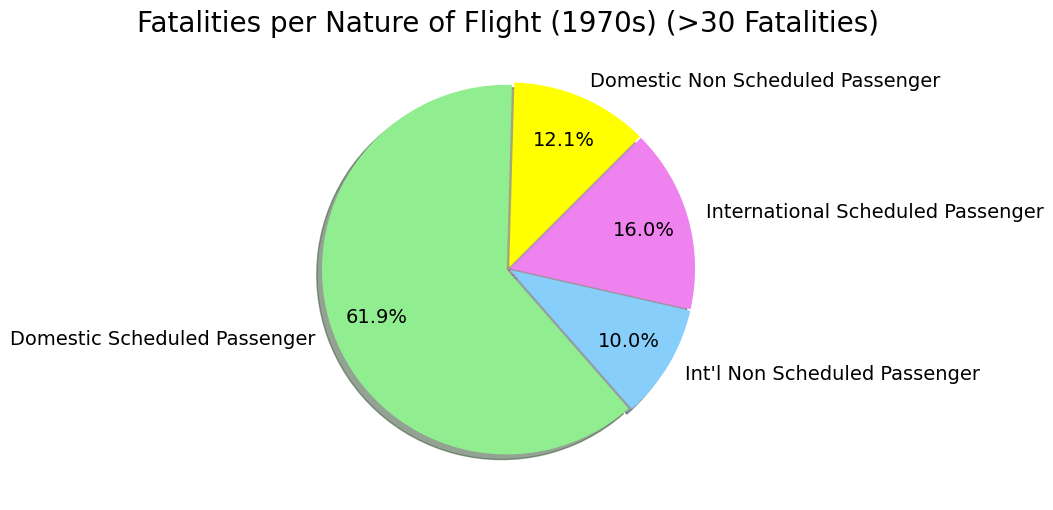

In [55]:
colorsPieList \
    = ['yellow',
       'lightgreen',
       'lightskyblue',
       'violet']

explodeTuple \
    = (0.01, 
       0.01, 
       0.01, 
       0.01)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (natureByFatalities1970sSeries.squeeze(), 
         colorsPieList,
         explodeTuple,
         'Fatalities per Nature of Flight (1970s) (>30 Fatalities)',
         startAngleFloatParameter \
            = 45.0,
         autoPercentStringParameter \
            = '%1.1f%%')

### **1980s**

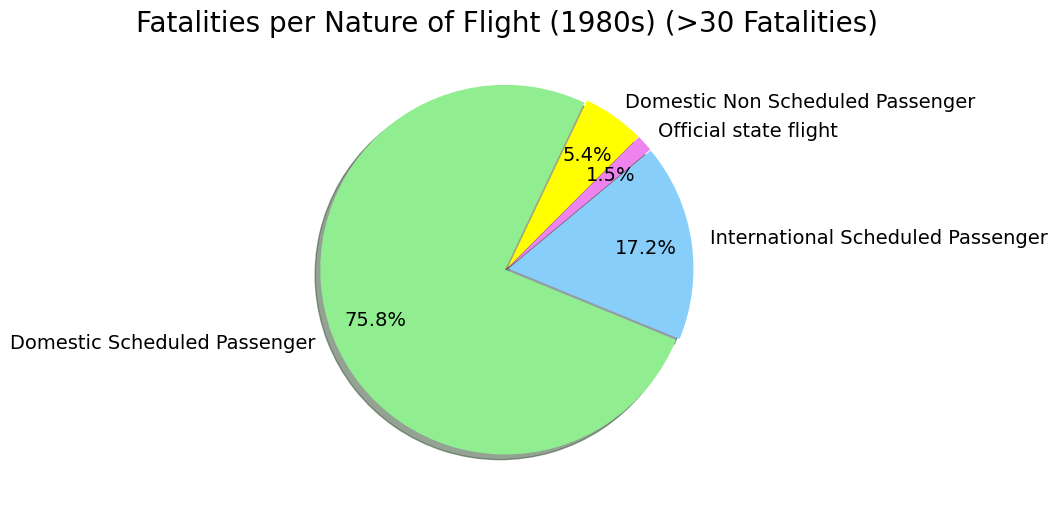

In [56]:
colorsPieList \
    = ['yellow',
       'lightgreen',
       'lightskyblue',
       'violet']

explodeTuple \
    = (0.01, 
       0.01, 
       0.01, 
       0.01)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (natureByFatalities1980sSeries.squeeze(), 
         colorsPieList,
         explodeTuple,
         'Fatalities per Nature of Flight (1980s) (>30 Fatalities)',
         startAngleFloatParameter \
            = 45.0,
         autoPercentStringParameter \
            = '%1.1f%%')

### **1990s**

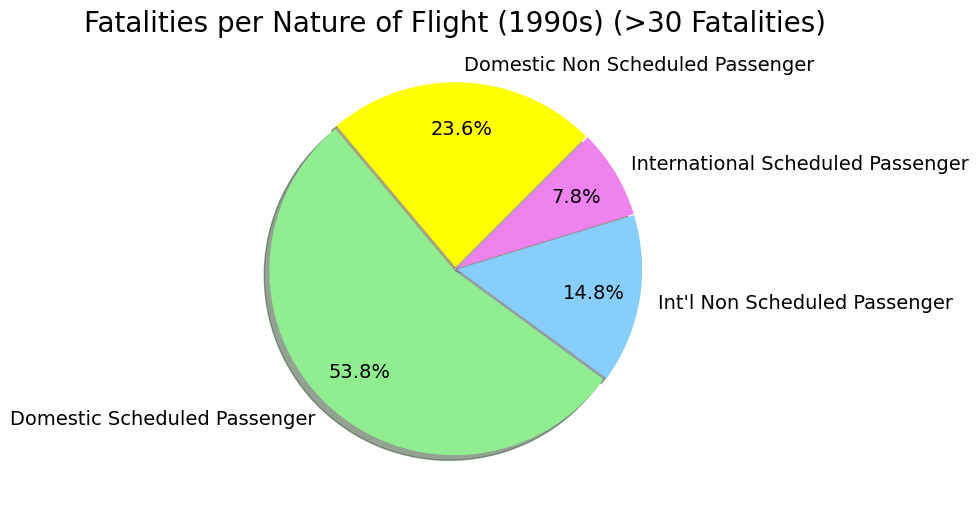

In [57]:
colorsPieList \
    = ['yellow',
       'lightgreen',
       'lightskyblue',
       'violet']

explodeTuple \
    = (0.01, 
       0.01, 
       0.01, 
       0.01)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (natureByFatalities1990sSeries.squeeze(), 
         colorsPieList,
         explodeTuple,
         'Fatalities per Nature of Flight (1990s) (>30 Fatalities)',
         startAngleFloatParameter \
            = 45.0,
         autoPercentStringParameter \
            = '%1.1f%%')

### **2000s**

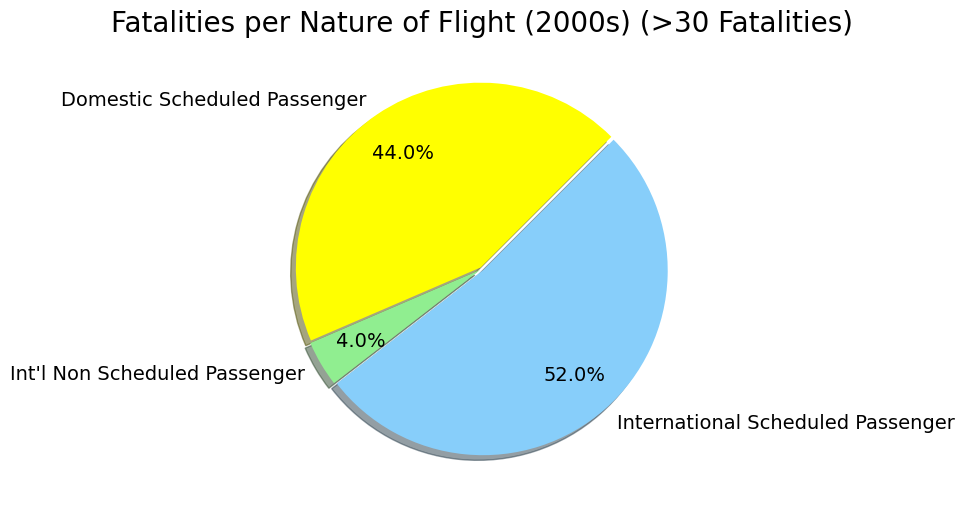

In [58]:
colorsPieList \
    = ['yellow',
       'lightgreen',
       'lightskyblue']

explodeTuple \
    = (0.01, 
       0.01, 
       0.01)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (natureByFatalities2000sSeries.squeeze(), 
         colorsPieList,
         explodeTuple,
         'Fatalities per Nature of Flight (2000s) (>30 Fatalities)',
         startAngleFloatParameter \
            = 45.0,
         autoPercentStringParameter \
            = '%1.1f%%')

### **2010s**

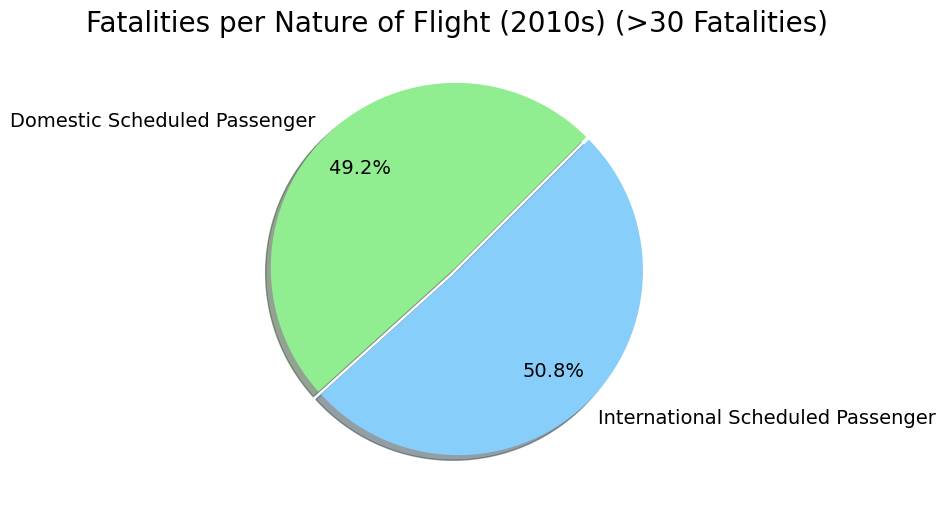

In [59]:
colorsPieList \
    = ['lightgreen',
       'lightskyblue']

explodeTuple \
    = (0.01, 
       0.01)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (natureByFatalities2010sSeries.squeeze(), 
         colorsPieList,
         explodeTuple,
         'Fatalities per Nature of Flight (2010s) (>30 Fatalities)',
         startAngleFloatParameter \
            = 45.0,
         autoPercentStringParameter \
            = '%1.1f%%')

### **2020s**

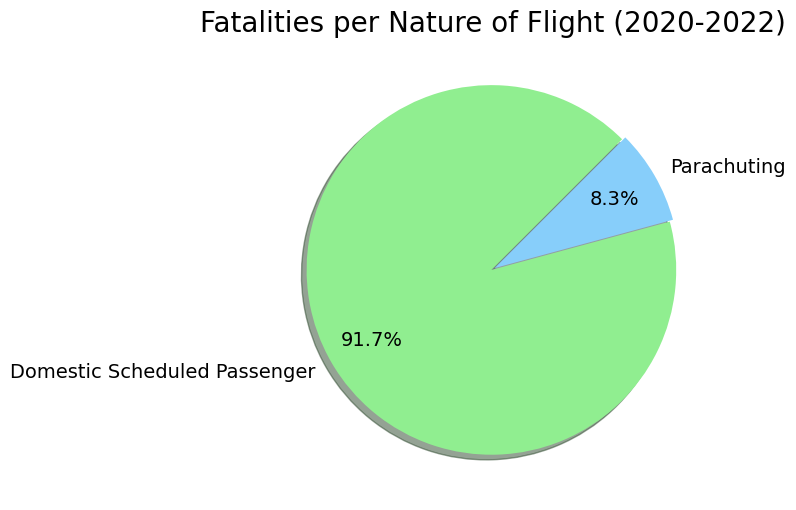

In [60]:
colorsPieList \
    = ['lightgreen',
       'lightskyblue']

explodeTuple \
    = (0.01, 
       0.01)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (natureByFatalities2020sSeries.squeeze(), 
         colorsPieList,
         explodeTuple,
         'Fatalities per Nature of Flight (2020-2022)',
         startAngleFloatParameter \
            = 45.0,
         autoPercentStringParameter \
            = '%1.1f%%')

### **1970-2022**

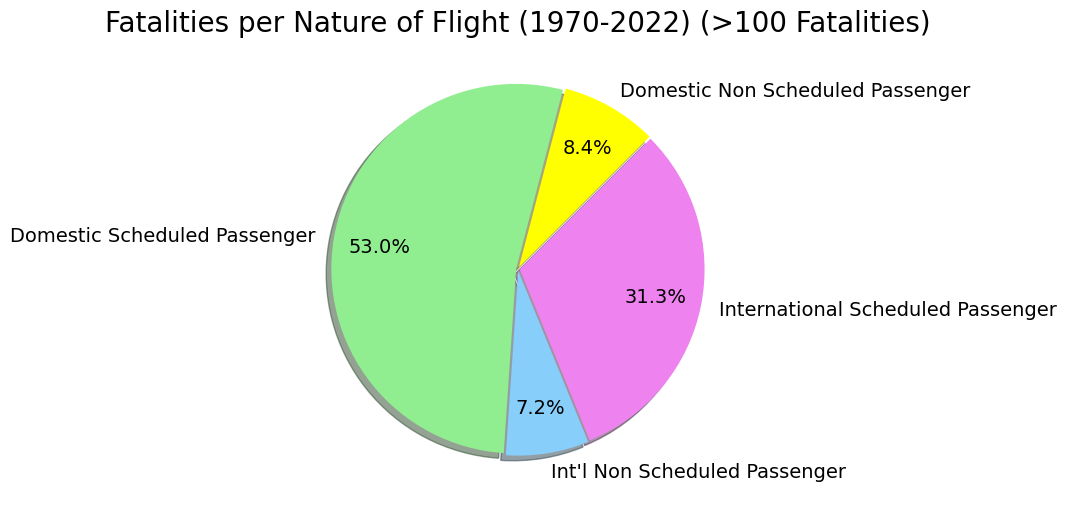

In [61]:
colorsPieList \
    = ['yellow',
       'lightgreen',
       'lightskyblue',
       'violet']

explodeTuple \
    = (0.01, 
       0.01, 
       0.01, 
       0.01)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (natureByFatalitiesSeries.squeeze(), 
         colorsPieList,
         explodeTuple,
         'Fatalities per Nature of Flight (1970-2022) (>100 Fatalities)',
         startAngleFloatParameter \
            = 45.0,
         autoPercentStringParameter \
            = '%1.1f%%')

# <br> **Section 9:  Fatalities per Departure Airport**

## **9.1: Calculations**

### **1970s**

In [62]:
departure1970sDataFrame \
    = accidents1970sDataFrame \
        [(accidents1970sDataFrame['fatalities'] > 30)]

departureByFatalities1970sSeries \
    = departure1970sDataFrame \
        .groupby \
            ('departure') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (departureByFatalities1970sSeries)

### **1980s**

In [63]:
departure1980sDataFrame \
    = accidents1980sDataFrame \
        [(accidents1980sDataFrame['fatalities'] > 30)]

departureByFatalities1980sSeries \
    = departure1980sDataFrame \
        .groupby \
            ('departure') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (departureByFatalities1980sSeries)

### **1990s**

In [64]:
departure1990sDataFrame \
    = accidents1990sDataFrame \
        [(accidents1990sDataFrame['fatalities'] > 30)]

departureByFatalities1990sSeries \
    = departure1990sDataFrame \
        .groupby \
            ('departure') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (departureByFatalities1990sSeries)

### **2000s**

In [65]:
departure2000sDataFrame \
    = accidents2000sDataFrame \
        [(accidents2000sDataFrame['fatalities'] > 30)]

departureByFatalities2000sSeries \
    = departure2000sDataFrame \
        .groupby \
            ('departure') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (departureByFatalities2000sSeries)

### **2010s**

In [66]:
departure2010sDataFrame \
    = accidents2010sDataFrame \
        [(accidents2010sDataFrame['fatalities'] > 30)]

departureByFatalities2010sSeries \
    = departure2010sDataFrame \
        .groupby \
            ('departure') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (departureByFatalities2010sSeries)

### **2020s**

In [67]:
departure2020sDataFrame \
    = accidents2020sDataFrame \
        [(accidents2020sDataFrame['fatalities'] > 0)]

departureByFatalities2020sSeries \
    = departure2020sDataFrame \
        .groupby \
            ('departure') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (departureByFatalities2020sSeries)

### **1970-2022**

In [68]:
departureDataFrame \
    = accidentsDataFrame \
        [(accidentsDataFrame['fatalities'] > 100)]

departureByFatalitiesSeries \
    = departureDataFrame \
        .groupby \
            ('departure') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (departureByFatalitiesSeries)

## **9.2: Display Information**

### **1970s**

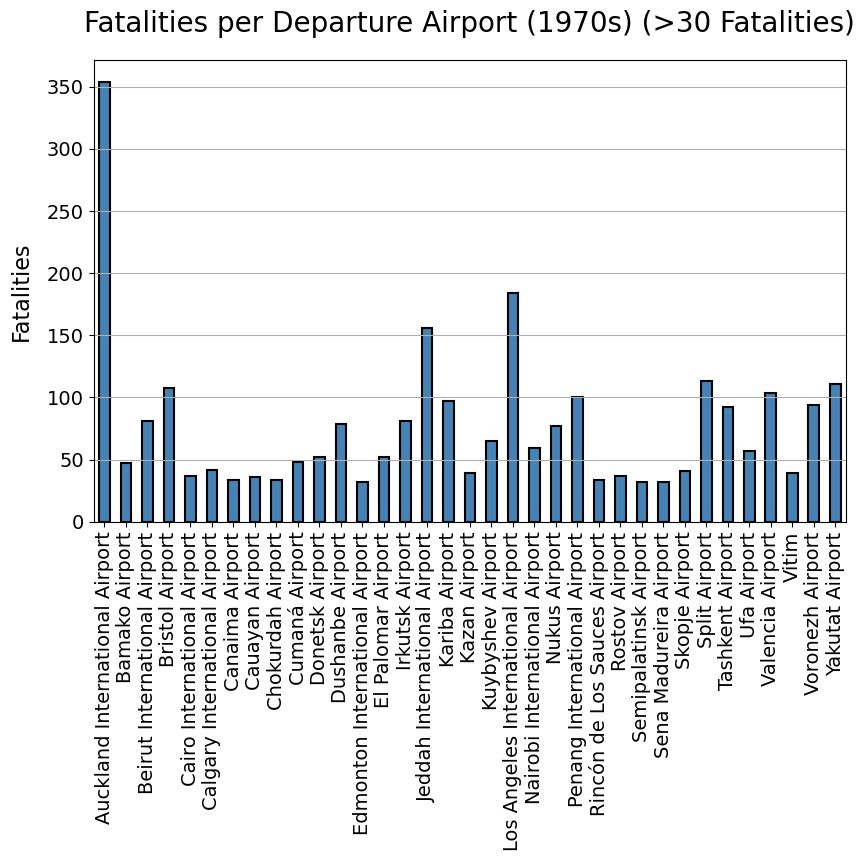

In [69]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (departureByFatalities1970sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Departure Airport (1970s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1980s**

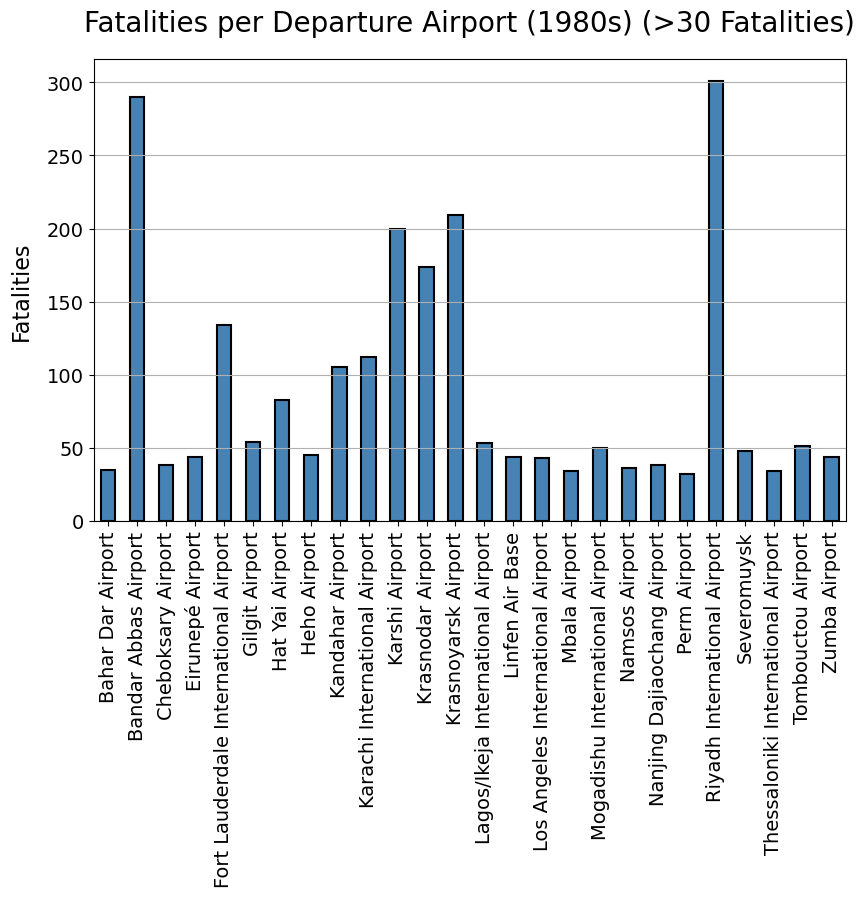

In [70]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (departureByFatalities1980sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Departure Airport (1980s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1990s**

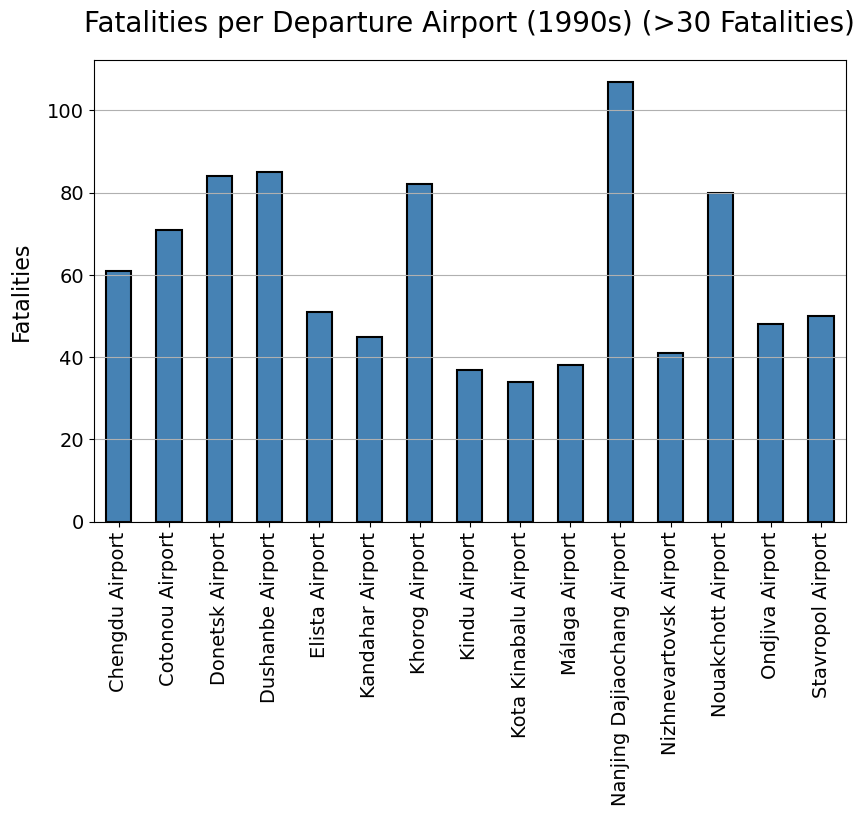

In [71]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (departureByFatalities1990sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Departure Airport (1990s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2000s**

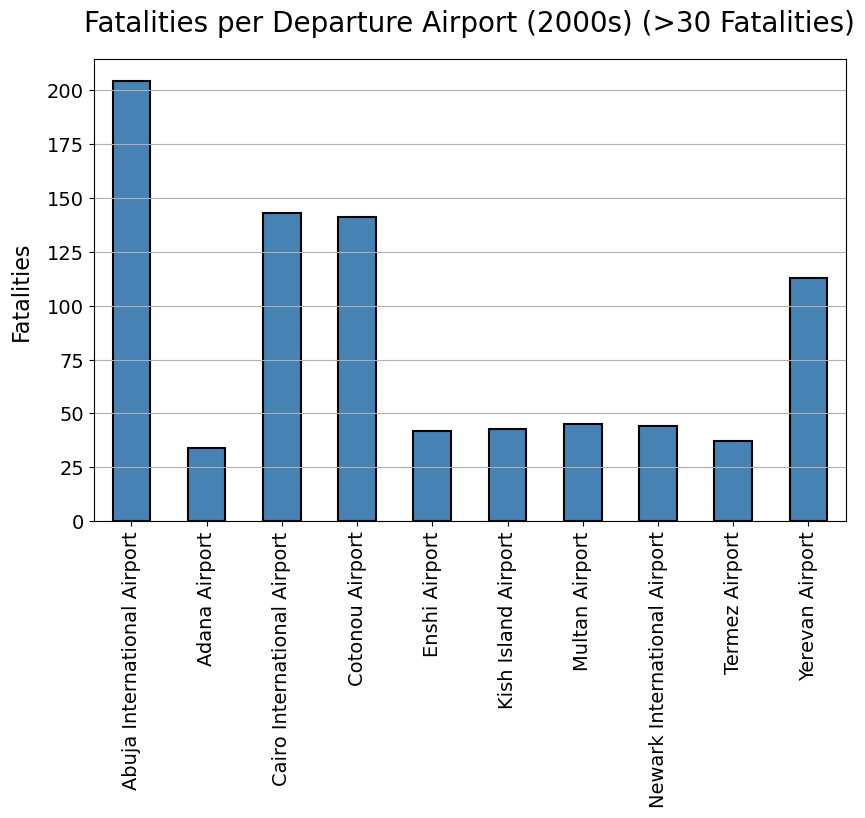

In [72]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (departureByFatalities2000sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Departure Airport (2000s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2010s**

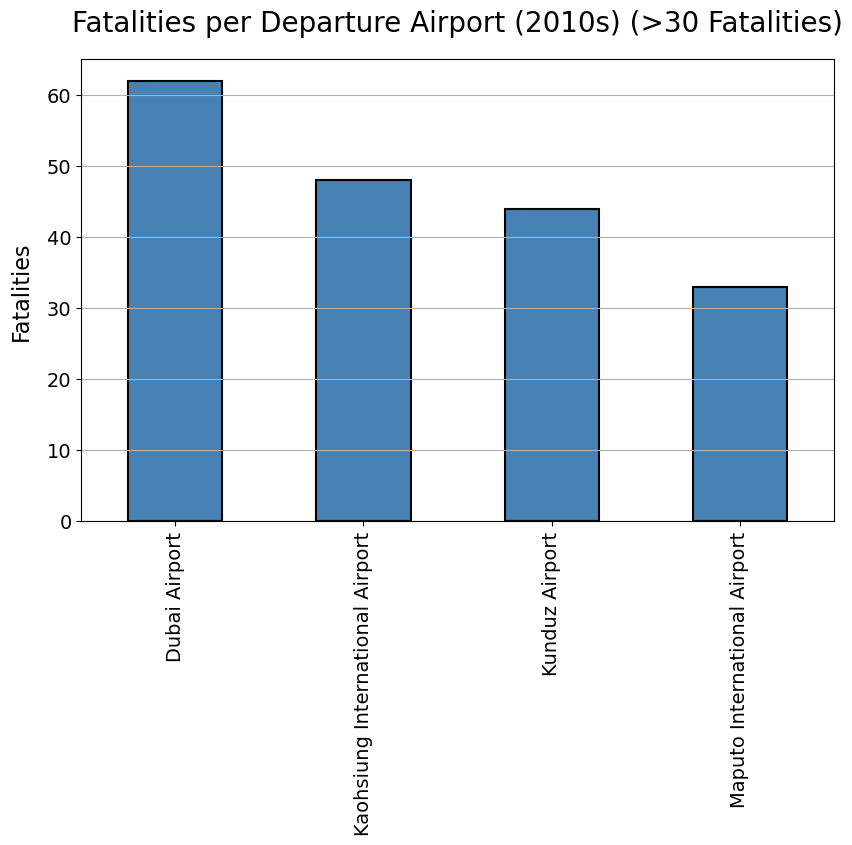

In [73]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (departureByFatalities2010sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Departure Airport (2010s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2020s**

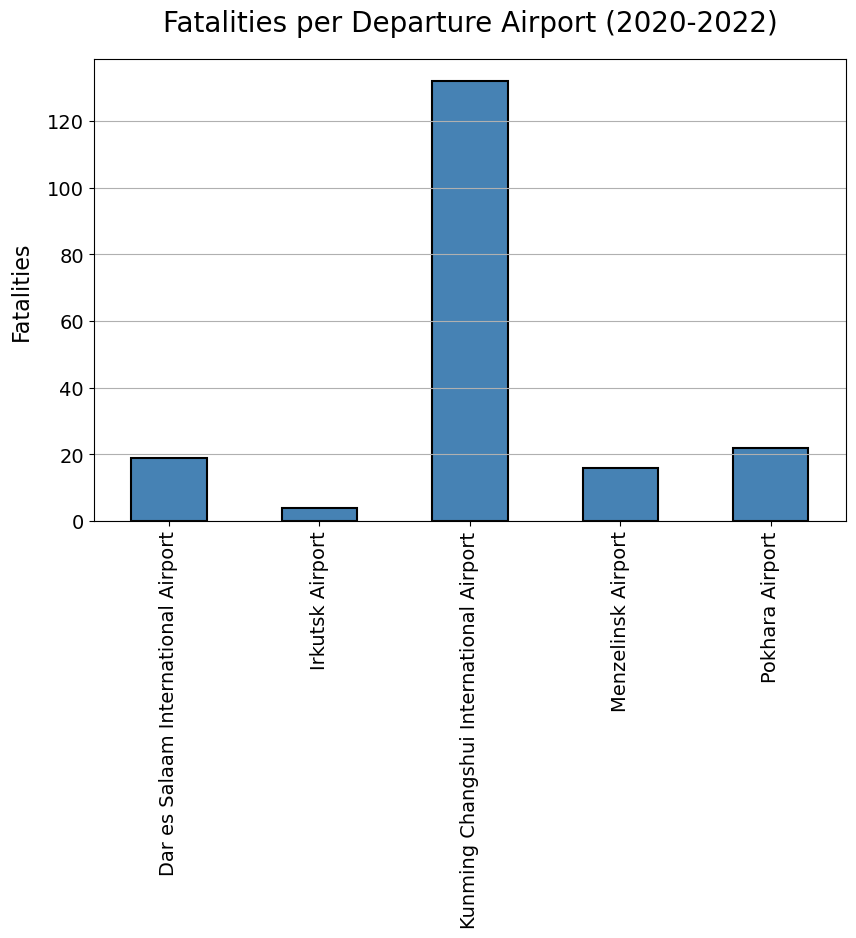

In [74]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (departureByFatalities2020sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Departure Airport (2020-2022)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1970-2022**

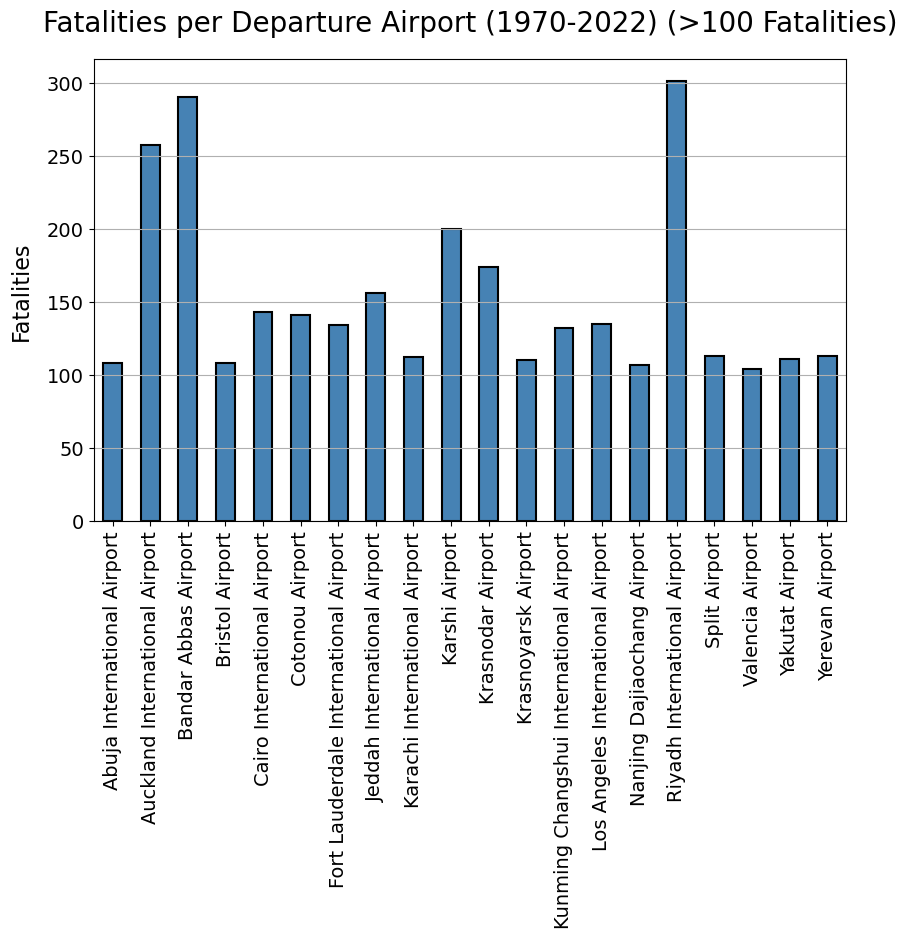

In [75]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (departureByFatalitiesSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Departure Airport (1970-2022) (>100 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

# <br> **Section 10:  Fatalities per Destination Airport**

## **10.1: Calculations**

### **1970s**

In [76]:
destination1970sDataFrame \
    = accidents1970sDataFrame \
        [(accidents1970sDataFrame['fatalities'] > 30)]

destinationByFatalities1970sSeries \
    = destination1970sDataFrame \
        .groupby \
            ('destination') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (destinationByFatalities1970sSeries)

### **1980s**

In [77]:
destination1980sDataFrame \
    = accidents1980sDataFrame \
        [(accidents1980sDataFrame['fatalities'] > 30)]

destinationByFatalities1980sSeries \
    = destination1980sDataFrame \
        .groupby \
            ('destination') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (destinationByFatalities1980sSeries)

### **1990s**

In [78]:
destination1990sDataFrame \
    = accidents1990sDataFrame \
        [(accidents1990sDataFrame['fatalities'] > 30)]

destinationByFatalities1990sSeries \
    = destination1990sDataFrame \
        .groupby \
            ('destination') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (destinationByFatalities1990sSeries)

### **2000s**

In [79]:
destination2000sDataFrame \
    = accidents2000sDataFrame \
        [(accidents2000sDataFrame['fatalities'] > 30)]

destinationByFatalities2000sSeries \
    = destination2000sDataFrame \
        .groupby \
            ('destination') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (destinationByFatalities2000sSeries)

### **2010s**

In [80]:
destination2010sDataFrame \
    = accidents2010sDataFrame \
        [(accidents2010sDataFrame['fatalities'] > 30)]

destinationByFatalities2010sSeries \
    = destination2010sDataFrame \
        .groupby \
            ('destination') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (destinationByFatalities2010sSeries)

### **2020s**

In [81]:
destination2020sDataFrame \
    = accidents2020sDataFrame \
        [(accidents2020sDataFrame['fatalities'] > 0)]

destinationByFatalities2020sSeries \
    = destination2020sDataFrame \
        .groupby \
            ('destination') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (destinationByFatalities2020sSeries)

### **1970-2022**

In [82]:
destinationDataFrame \
    = accidentsDataFrame \
        [(accidentsDataFrame['fatalities'] > 100)]

destinationByFatalitiesSeries \
    = destinationDataFrame \
        .groupby \
            ('destination') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (destinationByFatalitiesSeries)

## **10.2: Display Information**

### **1970s**

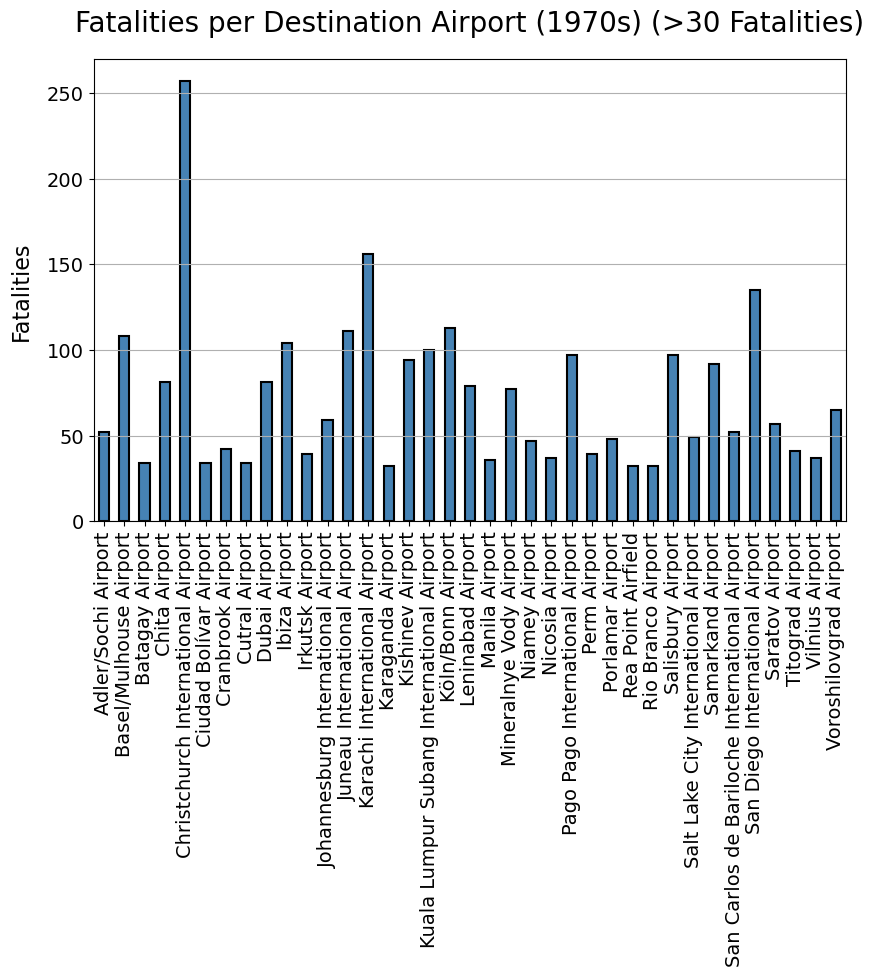

In [83]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (destinationByFatalities1970sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Destination Airport (1970s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1980s**

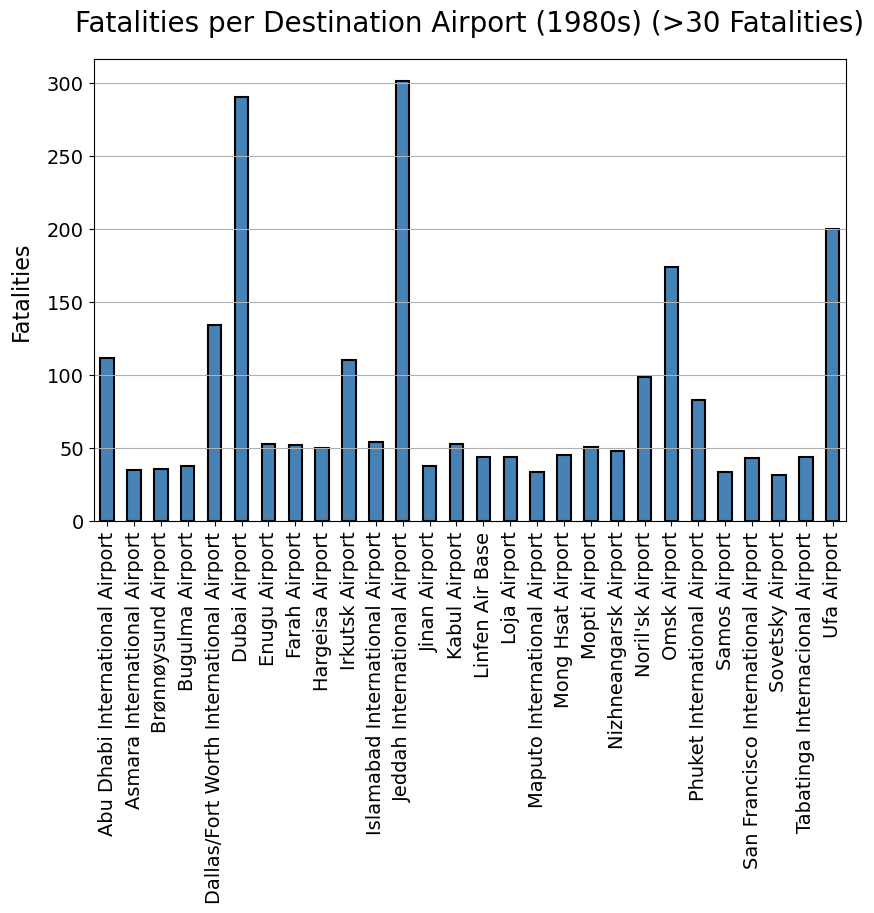

In [84]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (destinationByFatalities1980sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Destination Airport (1980s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1990s**

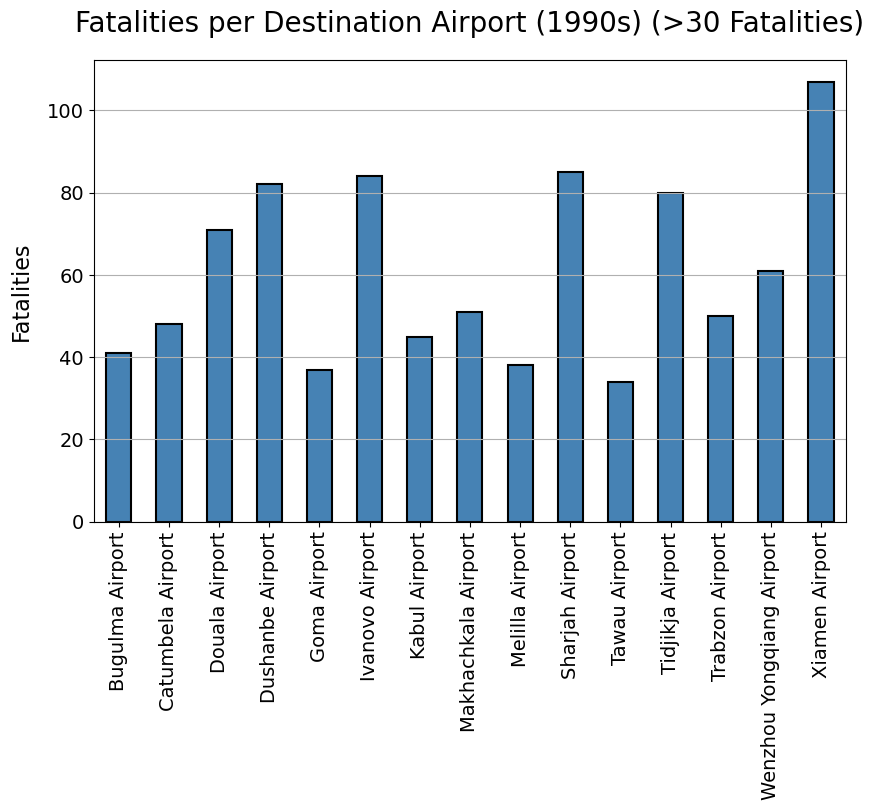

In [85]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (destinationByFatalities1990sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Destination Airport (1990s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2000s**

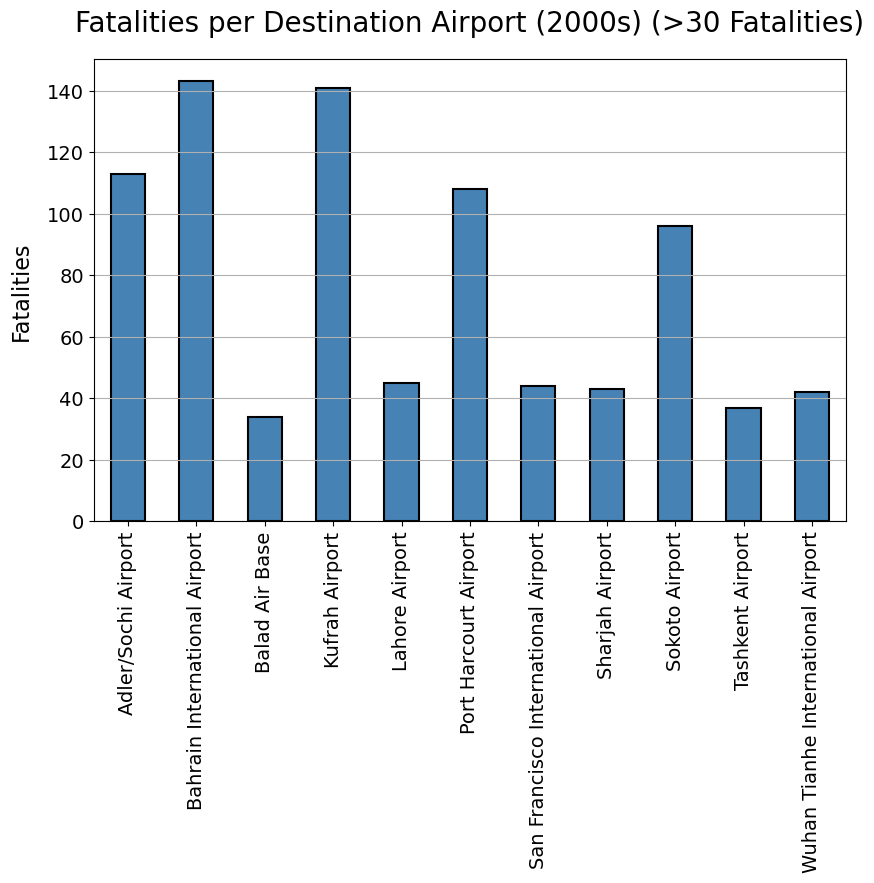

In [86]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (destinationByFatalities2000sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Destination Airport (2000s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2010s**

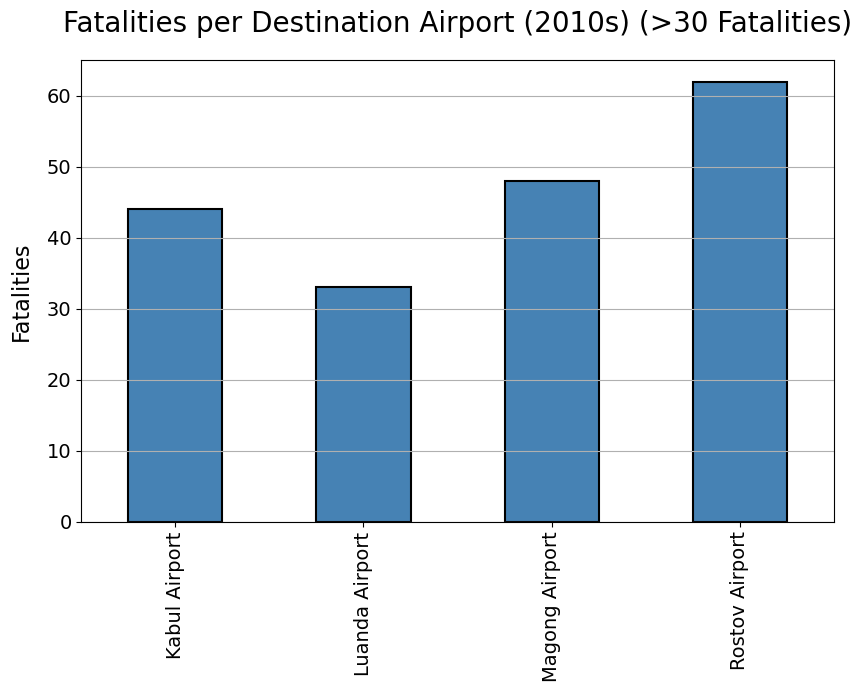

In [87]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (destinationByFatalities2010sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Destination Airport (2010s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2020s**

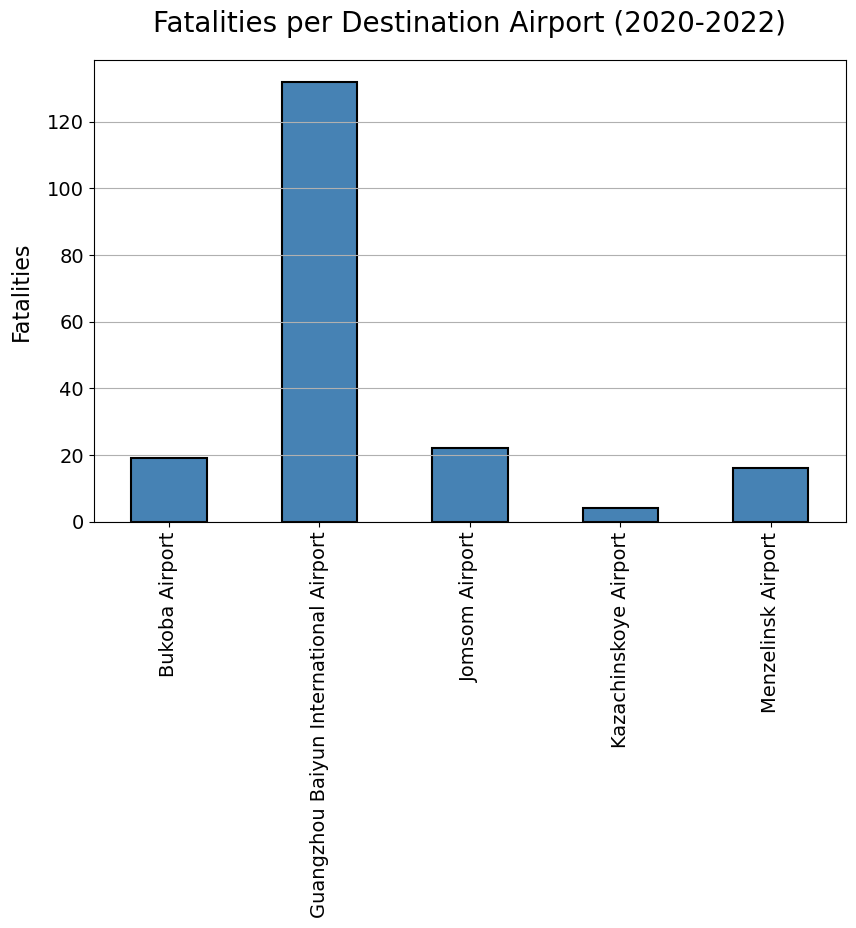

In [88]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (destinationByFatalities2020sSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Destination Airport (2020-2022)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1970-2022**

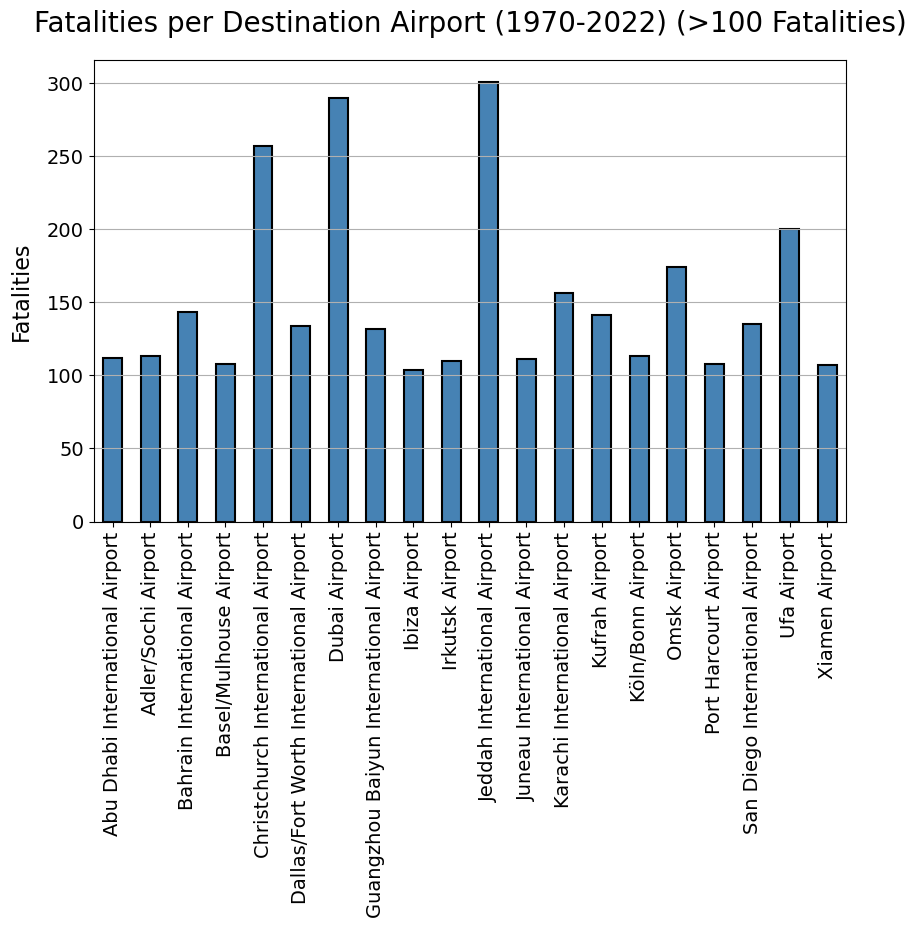

In [89]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (destinationByFatalitiesSeries.squeeze(),
         ['steelblue'],
         'Fatalities per Destination Airport (1970-2022) (>100 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

# <br> **Section 11:  Fatalities per Country**

## **11.1: Calculations**

### **1970s**

In [90]:
country1970sDataFrame \
    = accidents1970sDataFrame \
        [(accidents1970sDataFrame['fatalities'] > 30)]

countryByFatalities1970sSeries \
    = country1970sDataFrame \
        .groupby \
            ('country') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (countryByFatalities1970sSeries)

### **1980s**

In [91]:
country1980sDataFrame \
    = accidents1980sDataFrame \
        [(accidents1980sDataFrame['fatalities'] > 30)]

countryByFatalities1980sSeries \
    = country1980sDataFrame \
        .groupby \
            ('country') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (countryByFatalities1980sSeries)

### **1990s**

In [92]:
country1990sDataFrame \
    = accidents1990sDataFrame \
        [(accidents1990sDataFrame['fatalities'] > 30)]

countryByFatalities1990sSeries \
    = country1990sDataFrame \
        .groupby \
            ('country') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (countryByFatalities1990sSeries)

### **2000s**

In [93]:
country2000sDataFrame \
    = accidents2000sDataFrame \
        [(accidents2000sDataFrame['fatalities'] > 30)]

countryByFatalities2000sSeries \
    = country2000sDataFrame \
        .groupby \
            ('country') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (countryByFatalities2000sSeries)

### **2010s**

In [94]:
country2010sDataFrame \
    = accidents2010sDataFrame \
        [(accidents2010sDataFrame['fatalities'] > 30)]

countryByFatalities2010sSeries \
    = country2010sDataFrame \
        .groupby \
            ('country') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (countryByFatalities2010sSeries)

### **2020s**

In [95]:
country2020sDataFrame \
    = accidents2020sDataFrame \
        [(accidents2020sDataFrame['fatalities'] > 0)]

countryByFatalities2020sSeries \
    = country2020sDataFrame \
        .groupby \
            ('country') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (countryByFatalities2020sSeries)

### **1970-2022**

In [96]:
countryDataFrame \
    = accidentsDataFrame \
        [(accidentsDataFrame['fatalities'] > 100)]

countryByFatalitiesSeries \
    = countryDataFrame \
        .groupby \
            ('country') \
                ['fatalities'] \
        .sum()

        
log_function \
    .DebugReturnObjectWriteObject \
        (countryByFatalitiesSeries)

## **11.2: Display Information**

### **1970s**

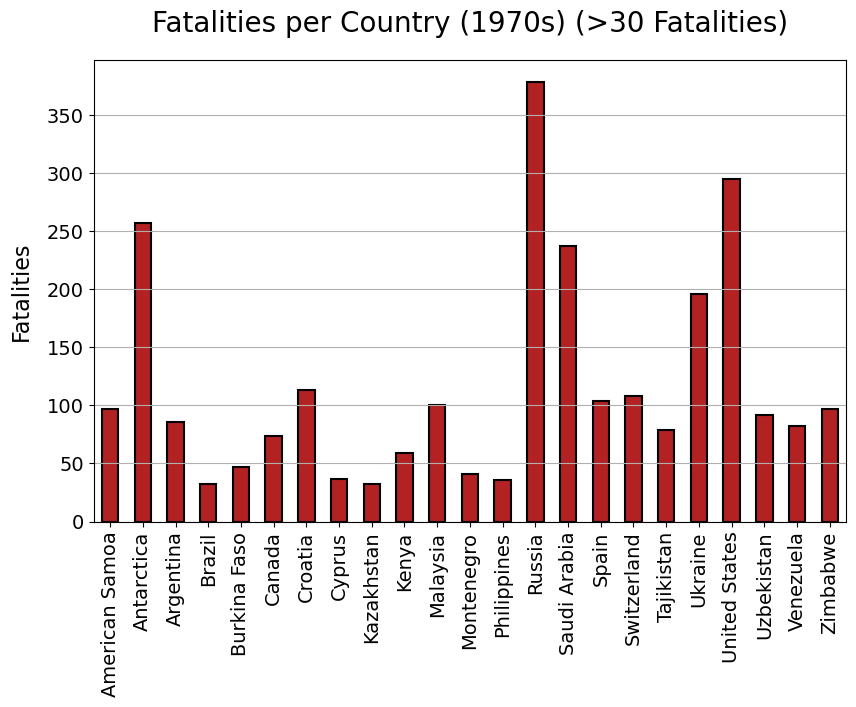

In [97]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (countryByFatalities1970sSeries.squeeze(),
         ['firebrick'],
         'Fatalities per Country (1970s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1980s**

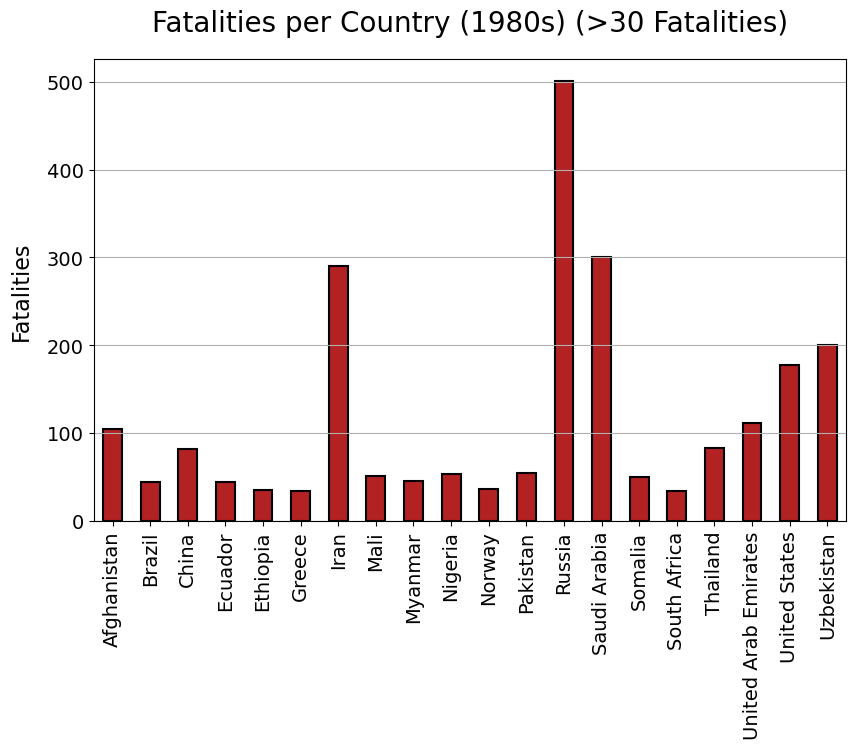

In [98]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (countryByFatalities1980sSeries.squeeze(),
         ['firebrick'],
         'Fatalities per Country (1980s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1990s**

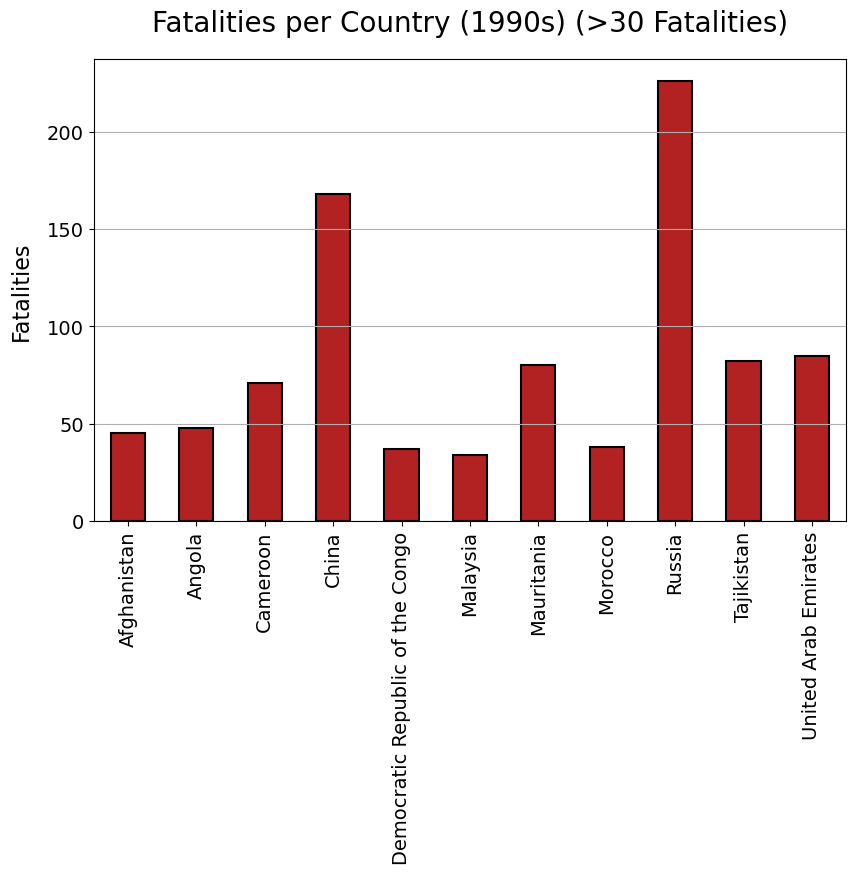

In [99]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (countryByFatalities1990sSeries.squeeze(),
         ['firebrick'],
         'Fatalities per Country (1990s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2000s**

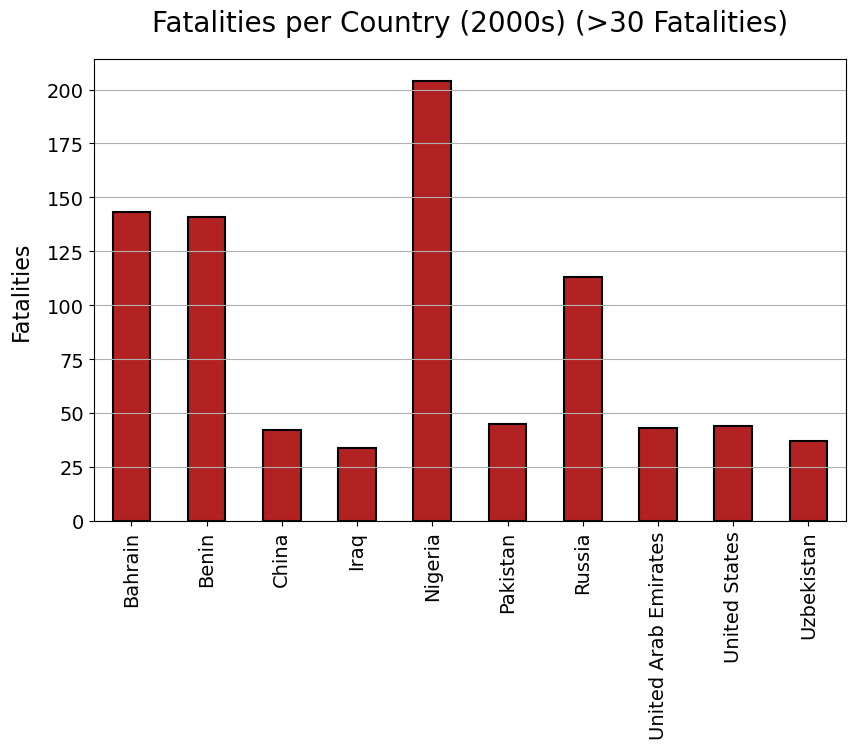

In [100]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (countryByFatalities2000sSeries.squeeze(),
         ['firebrick'],
         'Fatalities per Country (2000s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2010s**

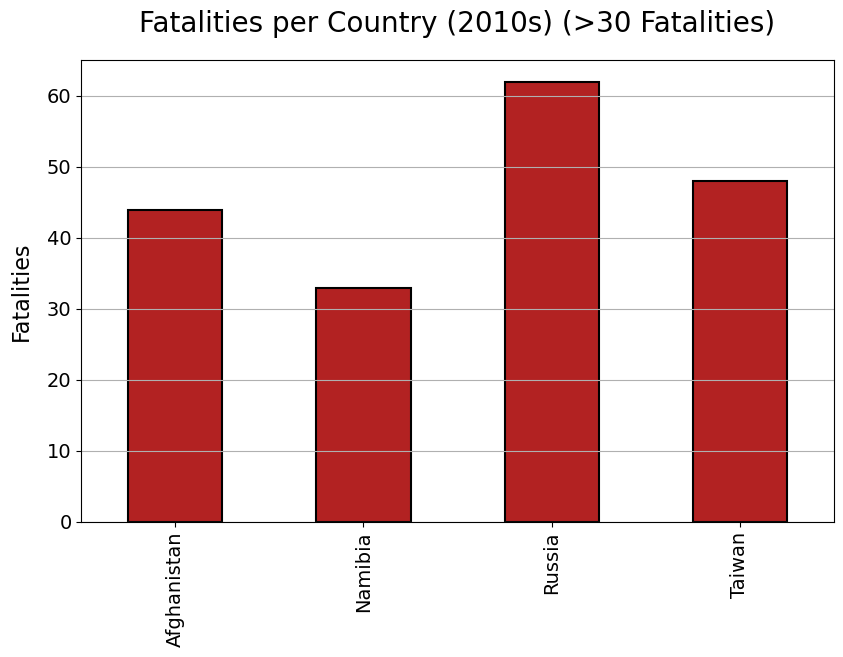

In [101]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (countryByFatalities2010sSeries.squeeze(),
         ['firebrick'],
         'Fatalities per Country (2010s) (>30 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **2020s**

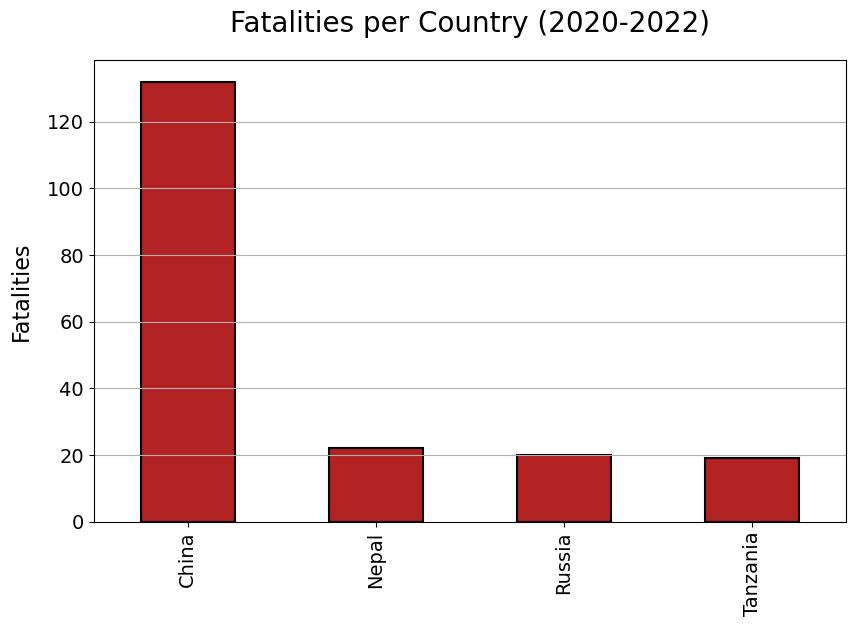

In [102]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (countryByFatalities2020sSeries.squeeze(),
         ['firebrick'],
         'Fatalities per Country (2020-2022)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

### **1970-2022**

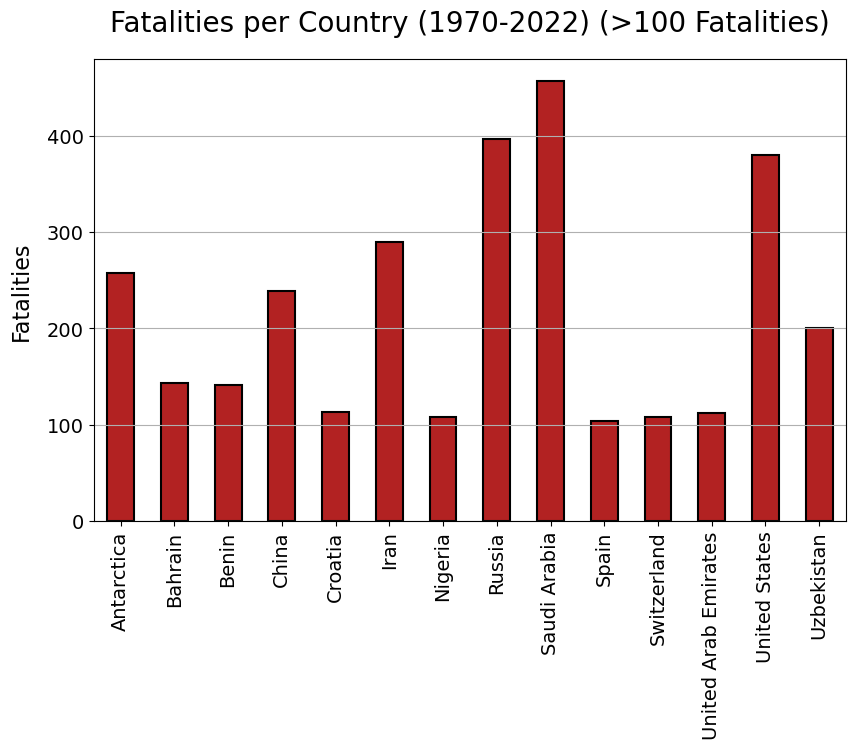

In [103]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (countryByFatalitiesSeries.squeeze(),
         ['firebrick'],
         'Fatalities per Country (1970-2022) (>100 Fatalities)',
         'Fatalities',
         xLabelStringParameter \
            = '',
         edgeColorStringParameter \
            = 'black',
         lineWidthFloatParameter \
            = 1.5,
         alphaFloatParameter \
            = 1.0,
         widthFloatParameter \
            = 0.5,
         axisTickLabelRotationFloatParameter \
            = 90.0)

In [104]:
#log_subroutine \
#    .EndProgramExecution()